In [337]:
import numpy as np
import pandas as pd
from collections import defaultdict
from sklearn.neighbors import DistanceMetric
from math import radians
import folium
import geopandas as gpd
from shapely.geometry import Point
from scipy.spatial import cKDTree
from shapely.geometry import Point
from shapely.ops import nearest_points
import matplotlib.pyplot as plt

# Acessando arquivos 

In [3]:
junho = pd.read_excel("C:/Users/marin/OneDrive/Área de Trabalho/TCC/TCC_TABELA_DE_HORARIOS-master (1)/TCC_TABELA_DE_HORARIOS-master/OD/viagens_validas_junho.xlsx", index_col='Unnamed: 0')
#junho.rename(columns={'index': 'index_col'}, inplace = True)
junho['index_col'] = None
junho.loc[junho.dataInicio.dt.month == 6, 'index_col'] = junho['index_col'].astype(str) + '_' + junho.dataInicio.dt.month.astype(str)

julho = pd.read_excel("C:/Users/marin/OneDrive/Área de Trabalho/TCC/TCC_TABELA_DE_HORARIOS-master (1)/TCC_TABELA_DE_HORARIOS-master/OD/viagens_validas_junho.xlsx", index_col='Unnamed: 0')
#julho.rename(columns={'index': 'index_col'}, inplace = True)
julho['index_col'] = None
julho.loc[julho.dataInicio.dt.month == 7, 'index_col'] = julho['index_col'].astype(str) + '_' + julho.dataInicio.dt.month.astype(str)

agosto = pd.read_excel("C:/Users/marin/OneDrive/Área de Trabalho/TCC/TCC_TABELA_DE_HORARIOS-master (1)/TCC_TABELA_DE_HORARIOS-master/OD/viagens_validas_junho.xlsx", index_col='Unnamed: 0')
#agosto.rename(columns={'index': 'index_col'}, inplace = True)
agosto['index_col'] = None
agosto.loc[agosto.dataInicio.dt.month == 8, 'index_col'] = agosto['index_col'].astype(str) + '_' + agosto.dataInicio.dt.month.astype(str)

viagens_validas = pd.concat([junho, julho, agosto], axis = 0)

viagens_validas

,MAC,latitudeI,longitudeI,latitudeF,longitudeF,cnt_pckg,duration,dataInicio,dataFim,day,device_id,sequence,periodo,duration(s),distance(m),index_col
0,40:06:a0:5b:8c:b2,-22.827145,-47.061214,-22.829490,-47.060281,40,78,2021-06-01 06:44:02,2021-06-01 06:45:20,1,0,1,Manha,78.0,333.068136,None_6
3,40:06:a0:5b:8c:b2,-22.827037,-47.061207,-22.829638,-47.060359,53,78,2021-06-01 07:58:17,2021-06-01 07:59:35,1,0,4,Manha,78.0,362.164440,None_6
5,40:06:a0:5b:8c:b2,-22.827116,-47.061166,-22.829648,-47.060414,38,78,2021-06-01 09:06:10,2021-06-01 09:07:28,1,0,6,Manha,78.0,350.063969,None_6
6,40:06:a0:5b:8c:b2,-22.827030,-47.061240,-22.829614,-47.060350,30,78,2021-06-01 11:10:03,2021-06-01 11:11:21,1,0,7,Manha,78.0,361.522224,None_6
8,40:06:a0:5b:8c:b2,-22.827211,-47.061172,-22.829681,-47.060513,63,81,2021-06-01 11:57:21,2021-06-01 11:58:42,1,0,9,Manha,81.0,339.187065,None_6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213491,50:92:b9:9f:4d:d4,-22.821159,-47.067949,-22.815148,-47.072541,7,1498,2021-06-30 16:15:30,2021-06-30 16:40:28,30,75263,1,Tarde,1498.0,980.348365,None
213527,70:fd:46:f2:04:f0,-22.829544,-47.062912,-22.822227,-47.069446,8,303,2021-06-30 16:21:45,2021-06-30 16:26:48,30,75299,1,Tarde,303.0,1263.711180,None
213557,50:92:b9:63:30:82,-22.825440,-47.065998,-22.822692,-47.069018,7,129,2021-06-30 16:24:24,2021-06-30 16:26:33,30,75329,1,Tarde,129.0,521.594598,None
213850,96:7a:e1:be:b1:b7,-22.830359,-47.064600,-22.831526,-47.062251,119,78,2021-06-30 17:53:38,2021-06-30 17:54:56,30,75621,1,Tarde,78.0,327.969797,None


In [4]:
viagens_validas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12747 entries, 0 to 213979
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   MAC          12747 non-null  object        
 1   latitudeI    12747 non-null  float64       
 2   longitudeI   12747 non-null  float64       
 3   latitudeF    12747 non-null  float64       
 4   longitudeF   12747 non-null  float64       
 5   cnt_pckg     12747 non-null  int64         
 6   duration     12747 non-null  int64         
 7   dataInicio   12747 non-null  datetime64[ns]
 8   dataFim      12747 non-null  datetime64[ns]
 9   day          12747 non-null  int64         
 10  device_id    12747 non-null  int64         
 11  sequence     12747 non-null  int64         
 12  periodo      12747 non-null  object        
 13  duration(s)  12747 non-null  float64       
 14  distance(m)  12747 non-null  float64       
 15  index_col    4249 non-null   object        
dtypes: 

# Mapeamento da OD de cada viagem


In [241]:
paradas_eletrico_inicio = pd.read_excel("C:/Users/marin/OneDrive/Área de Trabalho/TCC/_PontosEletrico_.xlsx")
paradas_eletrico_inicio.rename(columns={'Ponto': 'PontoInicial'}, inplace = True)
paradas_eletrico_inicio.rename(columns={'Ordem': 'OrdemChegada'}, inplace = True)
paradas_eletrico_inicio
paradas_eletrico_final = pd.read_excel("C:/Users/marin/OneDrive/Área de Trabalho/TCC/_PontosEletrico_.xlsx")
paradas_eletrico_final.rename(columns={'Ordem': 'OrdemSaida'}, inplace = True)
paradas_eletrico_final.rename(columns={'Ponto': 'PontoFinal'}, inplace = True)
paradas_eletrico_final

,PontoFinal,OrdemSaida,Lat,Long,Densidade
0,1,FEC / RS,-22.815664,-47.062650,175527.01560
1,2,RU / BCCL,-22.816567,-47.072617,161245.95310
2,3,ADunicamp (Associação de Docentes da Unicamp),-22.813326,-47.065407,134607.79690
3,4,IC / Pavilhão do IA,-22.815047,-47.064360,131100.25000
4,5,CEPETRO / Funcamp,-22.812777,-47.067752,103630.47660
5,6,NEPP / IC,-22.814714,-47.064024,98755.28906
6,7,FEA / Praça da Paz,-22.821312,-47.067412,95977.38281
7,8,CECI Berçário / FEA,-22.821001,-47.068121,91303.71094
8,9,IB / SIARQ,-22.819147,-47.072227,86938.40625
9,10,IQ / FEA,-22.819335,-47.067119,75935.28125


In [242]:
gpd1 = gpd.GeoDataFrame(viagens_validas, geometry=gpd.points_from_xy(viagens_validas.longitudeI, viagens_validas.latitudeI))
gpd2 = gpd.GeoDataFrame(paradas_eletrico_inicio, geometry=gpd.points_from_xy(paradas_eletrico_inicio.Long, paradas_eletrico_inicio.Lat))

gpd4 = gpd.GeoDataFrame(viagens_validas, geometry=gpd.points_from_xy(viagens_validas.longitudeF, viagens_validas.latitudeF))
gpd5 = gpd.GeoDataFrame(paradas_eletrico_final, geometry=gpd.points_from_xy(paradas_eletrico_final.Long, paradas_eletrico_final.Lat))


def ckdnearest(gdA, gdB):

    nA = np.array(list(gdA.geometry.apply(lambda x: (x.x, x.y))))
    nB = np.array(list(gdB.geometry.apply(lambda x: (x.x, x.y))))
    btree = cKDTree(nB)
    dist, idx = btree.query(nA, k=1)
    gdB_nearest = gdB.iloc[idx].drop(columns="geometry").reset_index(drop=True)
    gdf = pd.concat(
        [
            gdA.reset_index(drop=True),
            gdB_nearest,
            pd.Series(dist, name='dist')
        ], 
        axis=1)

    return gdf

gpd3=ckdnearest(gpd1, gpd2)

gpd4 = gpd.GeoDataFrame(viagens_validas, geometry=gpd.points_from_xy(viagens_validas.longitudeF, viagens_validas.latitudeF))
gpd5 = gpd.GeoDataFrame(paradas_eletrico_final, geometry=gpd.points_from_xy(paradas_eletrico_final.Long, paradas_eletrico_final.Lat))


def ckdnearest(gdA, gdB):

    nA = np.array(list(gdA.geometry.apply(lambda x: (x.x, x.y))))
    nB = np.array(list(gdB.geometry.apply(lambda x: (x.x, x.y))))
    btree = cKDTree(nB)
    dist, idx = btree.query(nA, k=1)
    gdB_nearest = gdB.iloc[idx].drop(columns="geometry").reset_index(drop=True)
    gdf = pd.concat(
        [
            gdA.reset_index(drop=True),
            gdB_nearest,
            pd.Series(dist, name='dist')
        ], 
        axis=1)

    return gdf


gpd6=ckdnearest(gpd4, gpd5)



In [243]:
gpd3

,MAC,latitudeI,longitudeI,latitudeF,longitudeF,cnt_pckg,duration,dataInicio,dataFim,day,...,duration(s),distance(m),index_col,geometry,PontoInicial,OrdemChegada,Lat,Long,Densidade,dist
0,40:06:a0:5b:8c:b2,-22.827145,-47.061214,-22.829490,-47.060281,40,78,2021-06-01 06:44:02,2021-06-01 06:45:20,1,...,78.0,333.068136,None_6,POINT (-47.06028 -22.82949),34,Escola Sérgio P. Porto (PONTO INICIAL),-22.827196,-47.061327,0.00000,0.000124
1,40:06:a0:5b:8c:b2,-22.827037,-47.061207,-22.829638,-47.060359,53,78,2021-06-01 07:58:17,2021-06-01 07:59:35,1,...,78.0,362.164440,None_6,POINT (-47.06036 -22.82964),35,Escola Sérgio P. Porto (PONTO FINAL),-22.827112,-47.061369,0.00000,0.000179
2,40:06:a0:5b:8c:b2,-22.827116,-47.061166,-22.829648,-47.060414,38,78,2021-06-01 09:06:10,2021-06-01 09:07:28,1,...,78.0,350.063969,None_6,POINT (-47.06041 -22.82965),34,Escola Sérgio P. Porto (PONTO INICIAL),-22.827196,-47.061327,0.00000,0.000180
3,40:06:a0:5b:8c:b2,-22.827030,-47.061240,-22.829614,-47.060350,30,78,2021-06-01 11:10:03,2021-06-01 11:11:21,1,...,78.0,361.522224,None_6,POINT (-47.06035 -22.82961),35,Escola Sérgio P. Porto (PONTO FINAL),-22.827112,-47.061369,0.00000,0.000153
4,40:06:a0:5b:8c:b2,-22.827211,-47.061172,-22.829681,-47.060513,63,81,2021-06-01 11:57:21,2021-06-01 11:58:42,1,...,81.0,339.187065,None_6,POINT (-47.06051 -22.82968),34,Escola Sérgio P. Porto (PONTO INICIAL),-22.827196,-47.061327,0.00000,0.000156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12742,50:92:b9:9f:4d:d4,-22.821159,-47.067949,-22.815148,-47.072541,7,1498,2021-06-30 16:15:30,2021-06-30 16:40:28,30,...,1498.0,980.348365,None,POINT (-47.07254 -22.81515),8,CECI Berçário / FEA,-22.821001,-47.068121,91303.71094,0.000234
12743,70:fd:46:f2:04:f0,-22.829544,-47.062912,-22.822227,-47.069446,8,303,2021-06-30 16:21:45,2021-06-30 16:26:48,30,...,303.0,1263.711180,None,POINT (-47.06945 -22.82223),14,CECOM,-22.829510,-47.063929,55047.34375,0.001018
12744,50:92:b9:63:30:82,-22.825440,-47.065998,-22.822692,-47.069018,7,129,2021-06-30 16:24:24,2021-06-30 16:26:33,30,...,129.0,521.594598,None,POINT (-47.06902 -22.82269),12,HC (Portaria F1),-22.825726,-47.066183,66145.30469,0.000341
12745,96:7a:e1:be:b1:b7,-22.830359,-47.064600,-22.831526,-47.062251,119,78,2021-06-30 17:53:38,2021-06-30 17:54:56,30,...,78.0,327.969797,None,POINT (-47.06225 -22.83153),14,CECOM,-22.829510,-47.063929,55047.34375,0.001082


In [244]:
gpd6

,MAC,latitudeI,longitudeI,latitudeF,longitudeF,cnt_pckg,duration,dataInicio,dataFim,day,...,duration(s),distance(m),index_col,geometry,PontoFinal,OrdemSaida,Lat,Long,Densidade,dist
0,40:06:a0:5b:8c:b2,-22.827145,-47.061214,-22.829490,-47.060281,40,78,2021-06-01 06:44:02,2021-06-01 06:45:20,1,...,78.0,333.068136,None_6,POINT (-47.06028 -22.82949),30,Hemocentro / FCM,-22.829614,-47.061370,30876.05859,0.001096
1,40:06:a0:5b:8c:b2,-22.827037,-47.061207,-22.829638,-47.060359,53,78,2021-06-01 07:58:17,2021-06-01 07:59:35,1,...,78.0,362.164440,None_6,POINT (-47.06036 -22.82964),30,Hemocentro / FCM,-22.829614,-47.061370,30876.05859,0.001011
2,40:06:a0:5b:8c:b2,-22.827116,-47.061166,-22.829648,-47.060414,38,78,2021-06-01 09:06:10,2021-06-01 09:07:28,1,...,78.0,350.063969,None_6,POINT (-47.06041 -22.82965),30,Hemocentro / FCM,-22.829614,-47.061370,30876.05859,0.000957
3,40:06:a0:5b:8c:b2,-22.827030,-47.061240,-22.829614,-47.060350,30,78,2021-06-01 11:10:03,2021-06-01 11:11:21,1,...,78.0,361.522224,None_6,POINT (-47.06035 -22.82961),30,Hemocentro / FCM,-22.829614,-47.061370,30876.05859,0.001020
4,40:06:a0:5b:8c:b2,-22.827211,-47.061172,-22.829681,-47.060513,63,81,2021-06-01 11:57:21,2021-06-01 11:58:42,1,...,81.0,339.187065,None_6,POINT (-47.06051 -22.82968),30,Hemocentro / FCM,-22.829614,-47.061370,30876.05859,0.000860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12742,50:92:b9:9f:4d:d4,-22.821159,-47.067949,-22.815148,-47.072541,7,1498,2021-06-30 16:15:30,2021-06-30 16:40:28,30,...,1498.0,980.348365,None,POINT (-47.07254 -22.81515),2,RU / BCCL,-22.816567,-47.072617,161245.95310,0.001421
12743,70:fd:46:f2:04:f0,-22.829544,-47.062912,-22.822227,-47.069446,8,303,2021-06-30 16:21:45,2021-06-30 16:26:48,30,...,303.0,1263.711180,None,POINT (-47.06945 -22.82223),33,SIC / Praça da Paz,-22.822701,-47.069055,27239.38086,0.000615
12744,50:92:b9:63:30:82,-22.825440,-47.065998,-22.822692,-47.069018,7,129,2021-06-30 16:24:24,2021-06-30 16:26:33,30,...,129.0,521.594598,None,POINT (-47.06902 -22.82269),33,SIC / Praça da Paz,-22.822701,-47.069055,27239.38086,0.000038
12745,96:7a:e1:be:b1:b7,-22.830359,-47.064600,-22.831526,-47.062251,119,78,2021-06-30 17:53:38,2021-06-30 17:54:56,30,...,78.0,327.969797,None,POINT (-47.06225 -22.83153),30,Hemocentro / FCM,-22.829614,-47.061370,30876.05859,0.002105


In [245]:
matriz_junho= pd.merge(gpd3, gpd6,how = 'inner' , on = ['MAC', 'index_col','day', 'device_id', 'periodo', 'sequence', 'distance(m)', 'duration(s)', 'dataInicio', 'dataFim','latitudeI', 'longitudeI', 'latitudeF', 'longitudeF'])
matriz_junho = matriz_junho[['index_col','day', 'device_id', 'periodo', 'dataInicio', 'dataFim', 'sequence', 'distance(m)',
       'duration(s)', 'latitudeI', 'longitudeI', 'latitudeF', 'longitudeF', 'OrdemSaida', 'OrdemChegada',
       'PontoFinal',  'dist_x','PontoInicial', 'dist_y']]

matriz_junho

,index_col,day,device_id,periodo,dataInicio,dataFim,sequence,distance(m),duration(s),latitudeI,longitudeI,latitudeF,longitudeF,OrdemSaida,OrdemChegada,PontoFinal,dist_x,PontoInicial,dist_y
0,None_6,1,0,Manha,2021-06-01 06:44:02,2021-06-01 06:45:20,1,333.068136,78.0,-22.827145,-47.061214,-22.829490,-47.060281,Hemocentro / FCM,Escola Sérgio P. Porto (PONTO INICIAL),30,0.000124,34,0.001096
1,None_6,1,0,Manha,2021-06-01 07:58:17,2021-06-01 07:59:35,4,362.164440,78.0,-22.827037,-47.061207,-22.829638,-47.060359,Hemocentro / FCM,Escola Sérgio P. Porto (PONTO FINAL),30,0.000179,35,0.001011
2,None_6,1,0,Manha,2021-06-01 09:06:10,2021-06-01 09:07:28,6,350.063969,78.0,-22.827116,-47.061166,-22.829648,-47.060414,Hemocentro / FCM,Escola Sérgio P. Porto (PONTO INICIAL),30,0.000180,34,0.000957
3,None_6,1,0,Manha,2021-06-01 11:10:03,2021-06-01 11:11:21,7,361.522224,78.0,-22.827030,-47.061240,-22.829614,-47.060350,Hemocentro / FCM,Escola Sérgio P. Porto (PONTO FINAL),30,0.000153,35,0.001020
4,None_6,1,0,Manha,2021-06-01 11:57:21,2021-06-01 11:58:42,9,339.187065,81.0,-22.827211,-47.061172,-22.829681,-47.060513,Hemocentro / FCM,Escola Sérgio P. Porto (PONTO INICIAL),30,0.000156,34,0.000860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21240,None,30,75621,Tarde,2021-06-30 17:53:38,2021-06-30 17:54:56,1,327.969797,78.0,-22.830359,-47.064600,-22.831526,-47.062251,Hemocentro / FCM,CECOM,30,0.001082,14,0.002105
21241,None,30,75750,Tarde,2021-06-30 18:28:00,2021-06-30 18:50:17,1,680.482332,1337.0,-22.816349,-47.072643,-22.814486,-47.067489,CEL / IG,RU / BCCL,24,0.000219,2,0.000976
21242,None,30,75750,Tarde,2021-06-30 18:28:00,2021-06-30 18:50:17,1,680.482332,1337.0,-22.816349,-47.072643,-22.814486,-47.067489,CEL / IG,RU / BCCL,24,0.000219,2,0.000976
21243,None,30,75750,Tarde,2021-06-30 18:28:00,2021-06-30 18:50:17,1,680.482332,1337.0,-22.816349,-47.072643,-22.814486,-47.067489,CEL / IG,RU / BCCL,24,0.000219,2,0.000976


In [246]:
matriz_junho

,index_col,day,device_id,periodo,dataInicio,dataFim,sequence,distance(m),duration(s),latitudeI,longitudeI,latitudeF,longitudeF,OrdemSaida,OrdemChegada,PontoFinal,dist_x,PontoInicial,dist_y
0,None_6,1,0,Manha,2021-06-01 06:44:02,2021-06-01 06:45:20,1,333.068136,78.0,-22.827145,-47.061214,-22.829490,-47.060281,Hemocentro / FCM,Escola Sérgio P. Porto (PONTO INICIAL),30,0.000124,34,0.001096
1,None_6,1,0,Manha,2021-06-01 07:58:17,2021-06-01 07:59:35,4,362.164440,78.0,-22.827037,-47.061207,-22.829638,-47.060359,Hemocentro / FCM,Escola Sérgio P. Porto (PONTO FINAL),30,0.000179,35,0.001011
2,None_6,1,0,Manha,2021-06-01 09:06:10,2021-06-01 09:07:28,6,350.063969,78.0,-22.827116,-47.061166,-22.829648,-47.060414,Hemocentro / FCM,Escola Sérgio P. Porto (PONTO INICIAL),30,0.000180,34,0.000957
3,None_6,1,0,Manha,2021-06-01 11:10:03,2021-06-01 11:11:21,7,361.522224,78.0,-22.827030,-47.061240,-22.829614,-47.060350,Hemocentro / FCM,Escola Sérgio P. Porto (PONTO FINAL),30,0.000153,35,0.001020
4,None_6,1,0,Manha,2021-06-01 11:57:21,2021-06-01 11:58:42,9,339.187065,81.0,-22.827211,-47.061172,-22.829681,-47.060513,Hemocentro / FCM,Escola Sérgio P. Porto (PONTO INICIAL),30,0.000156,34,0.000860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21240,None,30,75621,Tarde,2021-06-30 17:53:38,2021-06-30 17:54:56,1,327.969797,78.0,-22.830359,-47.064600,-22.831526,-47.062251,Hemocentro / FCM,CECOM,30,0.001082,14,0.002105
21241,None,30,75750,Tarde,2021-06-30 18:28:00,2021-06-30 18:50:17,1,680.482332,1337.0,-22.816349,-47.072643,-22.814486,-47.067489,CEL / IG,RU / BCCL,24,0.000219,2,0.000976
21242,None,30,75750,Tarde,2021-06-30 18:28:00,2021-06-30 18:50:17,1,680.482332,1337.0,-22.816349,-47.072643,-22.814486,-47.067489,CEL / IG,RU / BCCL,24,0.000219,2,0.000976
21243,None,30,75750,Tarde,2021-06-30 18:28:00,2021-06-30 18:50:17,1,680.482332,1337.0,-22.816349,-47.072643,-22.814486,-47.067489,CEL / IG,RU / BCCL,24,0.000219,2,0.000976


In [247]:
matriz_junho_agrupada=matriz_junho.groupby(by=[matriz_junho.dataInicio.dt.month,matriz_junho.day, matriz_junho.periodo,'PontoInicial','PontoFinal']).agg({'sequence': 'count'}).reset_index()

matriz_junho_agrupada

,dataInicio,day,periodo,PontoInicial,PontoFinal,sequence
0,6,1,Manha,2,8,5
1,6,1,Manha,2,11,10
2,6,1,Manha,2,20,10
3,6,1,Manha,6,3,5
4,6,1,Manha,6,29,5
...,...,...,...,...,...,...
2783,6,30,Tarde,28,14,5
2784,6,30,Tarde,30,14,10
2785,6,30,Tarde,30,26,5
2786,6,30,Tarde,30,30,5


In [248]:
pivotttt = matriz_junho_agrupada[   (matriz_junho_agrupada['dataInicio'] == 6)  &
                                    (matriz_junho_agrupada['day'] == 1)         &
                                    (matriz_junho_agrupada['periodo'] == 'Tarde')].pivot(index= 'PontoInicial', columns='PontoFinal', values='sequence').fillna(0)
pivotttt

PontoFinal,1,2,3,6,7,8,10,11,12,14,...,21,22,24,26,28,29,30,31,32,33
PontoInicial,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,15.0,0.0,5.0,5.0,10.0,0.0,0.0,0.0,0.0,0.0
6,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,10.0,5.0
8,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,5.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,10.0,0.0,5.0,0.0,0.0,0.0
14,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [249]:
matriz_junho_agrupada=matriz_junho.groupby(by=['day','PontoInicial','PontoFinal']).count()
matriz_junho_agrupada

index_col  device_id  periodo  dataInicio  \
day PontoInicial PontoFinal                                              
1   1            11                  1          5        5           5   
                 31                  2         10       10          10   
    2            8                   2         10       10          10   
                 11                  2         10       10          10   
                 20                  3         15       15          15   
...                                ...        ...      ...         ...   
30  30           14                  2         10       10          10   
                 26                  1          5        5           5   
                 30                  1          5        5           5   
    32           16                  1          5        5           5   
    33           32                  1          5        5           5   

                             dataFim  sequence  distance(m)  duration(s)  \
day PontoInicial PontoFinal                                                
1   1            11                5         5            5            5   
                 31               10        10           10           10   
    2            8                10        10           10           10   
                 11               10        10           10           10   
                 20               15        15           15           15   
...                              ...       ...          ...          ...   
30  30           14               10        10           10           10   
                 26                5         5            5            5   
                 30                5         5            5            5   
    32           16                5         5            5            5   
    33           32                5         5            5            5   

                             latitudeI  longitudeI  latitudeF  longitudeF  \
day PontoInicial PontoFinal                                                 
1   1            11                  5           5          5           5   
                 31                 10          10         10          10   
    2            8                  10          10         10          10   
                 11                 10          10         10          10   
                 20                 15          15         15          15   
...                                ...         ...        ...         ...   
30  30           14                 10          10         10          10   
                 26                  5           5          5           5   
                 30                  5           5          5           5   
    32           16                  5           5          5           5   
    33           32                  5           5          5           5   

                             OrdemSaida  OrdemChegada  dist_x  dist_y  
day PontoInicial PontoFinal                                            
1   1            11                   5             5       5       5  
                 31                  10            10      10      10  
    2            8                   10            10      10      10  
                 11                  10            10      10      10  
                 20                  15            15      15      15  
...                                 ...           ...     ...     ...  
30  30           14                  10            10      10      10  
                 26                   5             5       5       5  
                 30                   5             5       5       5  
    32           16                   5             5       5       5  
    33           32                   5             5       5       5  

[2325 rows x 16 columns]

In [250]:
matriz_junho_1=matriz_junho.loc[matriz_junho['day']==1]
matriz_junho_1
# matriz_junho_1.to_excel('matriz_junho_agrupada_1.xlsx', index = False)

,index_col,day,device_id,periodo,dataInicio,dataFim,sequence,distance(m),duration(s),latitudeI,longitudeI,latitudeF,longitudeF,OrdemSaida,OrdemChegada,PontoFinal,dist_x,PontoInicial,dist_y
0,None_6,1,0,Manha,2021-06-01 06:44:02,2021-06-01 06:45:20,1,333.068136,78.0,-22.827145,-47.061214,-22.829490,-47.060281,Hemocentro / FCM,Escola Sérgio P. Porto (PONTO INICIAL),30,0.000124,34,0.001096
1,None_6,1,0,Manha,2021-06-01 07:58:17,2021-06-01 07:59:35,4,362.164440,78.0,-22.827037,-47.061207,-22.829638,-47.060359,Hemocentro / FCM,Escola Sérgio P. Porto (PONTO FINAL),30,0.000179,35,0.001011
2,None_6,1,0,Manha,2021-06-01 09:06:10,2021-06-01 09:07:28,6,350.063969,78.0,-22.827116,-47.061166,-22.829648,-47.060414,Hemocentro / FCM,Escola Sérgio P. Porto (PONTO INICIAL),30,0.000180,34,0.000957
3,None_6,1,0,Manha,2021-06-01 11:10:03,2021-06-01 11:11:21,7,361.522224,78.0,-22.827030,-47.061240,-22.829614,-47.060350,Hemocentro / FCM,Escola Sérgio P. Porto (PONTO FINAL),30,0.000153,35,0.001020
4,None_6,1,0,Manha,2021-06-01 11:57:21,2021-06-01 11:58:42,9,339.187065,81.0,-22.827211,-47.061172,-22.829681,-47.060513,Hemocentro / FCM,Escola Sérgio P. Porto (PONTO INICIAL),30,0.000156,34,0.000860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14576,None,1,4254,Tarde,2021-06-01 19:08:46,2021-06-01 19:11:15,1,905.639674,149.0,-22.825443,-47.066544,-22.830972,-47.062265,Hemocentro / FCM,HC (Portaria F1),30,0.000459,12,0.001627
14585,None,1,4320,Tarde,2021-06-01 19:14:06,2021-06-01 19:16:47,1,337.169111,161.0,-22.827601,-47.067105,-22.825194,-47.066265,HC (Portaria F1),CAISM / Portaria 2 - HC,12,0.000406,18,0.000538
14586,None,1,4320,Tarde,2021-06-01 19:14:06,2021-06-01 19:16:47,1,337.169111,161.0,-22.827601,-47.067105,-22.825194,-47.066265,HC (Portaria F1),CAISM / Portaria 2 - HC,12,0.000406,18,0.000538
14587,None,1,4320,Tarde,2021-06-01 19:14:06,2021-06-01 19:16:47,1,337.169111,161.0,-22.827601,-47.067105,-22.825194,-47.066265,HC (Portaria F1),CAISM / Portaria 2 - HC,12,0.000406,18,0.000538


# Resolvendo o p-Medianas

In [251]:
from pyclustering.cluster.kmedians import kmedians
from pyclustering.cluster import cluster_visualizer

In [252]:
matriz_junho.head(15)

,index_col,day,device_id,periodo,dataInicio,dataFim,sequence,distance(m),duration(s),latitudeI,longitudeI,latitudeF,longitudeF,OrdemSaida,OrdemChegada,PontoFinal,dist_x,PontoInicial,dist_y
0,None_6,1,0,Manha,2021-06-01 06:44:02,2021-06-01 06:45:20,1,333.068136,78.0,-22.827145,-47.061214,-22.829490,-47.060281,Hemocentro / FCM,Escola Sérgio P. Porto (PONTO INICIAL),30,0.000124,34,0.001096
1,None_6,1,0,Manha,2021-06-01 07:58:17,2021-06-01 07:59:35,4,362.164440,78.0,-22.827037,-47.061207,-22.829638,-47.060359,Hemocentro / FCM,Escola Sérgio P. Porto (PONTO FINAL),30,0.000179,35,0.001011
2,None_6,1,0,Manha,2021-06-01 09:06:10,2021-06-01 09:07:28,6,350.063969,78.0,-22.827116,-47.061166,-22.829648,-47.060414,Hemocentro / FCM,Escola Sérgio P. Porto (PONTO INICIAL),30,0.000180,34,0.000957
3,None_6,1,0,Manha,2021-06-01 11:10:03,2021-06-01 11:11:21,7,361.522224,78.0,-22.827030,-47.061240,-22.829614,-47.060350,Hemocentro / FCM,Escola Sérgio P. Porto (PONTO FINAL),30,0.000153,35,0.001020
4,None_6,1,0,Manha,2021-06-01 11:57:21,2021-06-01 11:58:42,9,339.187065,81.0,-22.827211,-47.061172,-22.829681,-47.060513,Hemocentro / FCM,Escola Sérgio P. Porto (PONTO INICIAL),30,0.000156,34,0.000860
5,None_6,1,0,Tarde,2021-06-01 13:11:24,2021-06-01 13:12:40,12,372.564991,76.0,-22.826960,-47.061293,-22.829611,-47.060336,Hemocentro / FCM,Escola Sérgio P. Porto (PONTO FINAL),30,0.000170,35,0.001034
6,None_6,1,0,Tarde,2021-06-01 13:55:05,2021-06-01 13:56:25,13,344.064957,80.0,-22.827157,-47.061188,-22.829680,-47.060602,Hemocentro / FCM,Escola Sérgio P. Porto (PONTO INICIAL),30,0.000145,34,0.000771
7,None_6,1,0,Tarde,2021-06-01 14:31:53,2021-06-01 14:33:33,14,369.088840,100.0,-22.826986,-47.061290,-22.829688,-47.060639,Hemocentro / FCM,Escola Sérgio P. Porto (PONTO FINAL),30,0.000149,35,0.000735
8,None_6,1,0,Tarde,2021-06-01 14:56:59,2021-06-01 14:59:37,15,347.241352,158.0,-22.827141,-47.061162,-22.829649,-47.060402,Hemocentro / FCM,Escola Sérgio P. Porto (PONTO INICIAL),30,0.000174,34,0.000969
9,None_6,1,0,Tarde,2021-06-01 15:38:00,2021-06-01 16:02:17,17,315.806014,1457.0,-22.827537,-47.061047,-22.829799,-47.060286,Hemocentro / FCM,Escola Sérgio P. Porto (PONTO INICIAL),30,0.000442,34,0.001100


In [253]:
paradas_eletrico_final.head(10)

,PontoFinal,OrdemSaida,Lat,Long,Densidade,geometry
0,1,FEC / RS,-22.815664,-47.062650,175527.01560,POINT (-47.06265 -22.81566)
1,2,RU / BCCL,-22.816567,-47.072617,161245.95310,POINT (-47.07262 -22.81657)
2,3,ADunicamp (Associação de Docentes da Unicamp),-22.813326,-47.065407,134607.79690,POINT (-47.06541 -22.81333)
3,4,IC / Pavilhão do IA,-22.815047,-47.064360,131100.25000,POINT (-47.06436 -22.81505)
4,5,CEPETRO / Funcamp,-22.812777,-47.067752,103630.47660,POINT (-47.06775 -22.81278)
5,6,NEPP / IC,-22.814714,-47.064024,98755.28906,POINT (-47.06402 -22.81471)
6,7,FEA / Praça da Paz,-22.821312,-47.067412,95977.38281,POINT (-47.06741 -22.82131)
7,8,CECI Berçário / FEA,-22.821001,-47.068121,91303.71094,POINT (-47.06812 -22.82100)
8,9,IB / SIARQ,-22.819147,-47.072227,86938.40625,POINT (-47.07223 -22.81915)
9,10,IQ / FEA,-22.819335,-47.067119,75935.28125,POINT (-47.06712 -22.81933)


In [254]:
# kmedians.__init__	(	 	self, 	data, 	initial_centers, 	tolerance = 0.001, 	ccore = True, 	kwargs )		

# [in]	data	(list): Input data that is presented as list of points (objects), each point should be represented by list or tuple.
# [in]	initial_centers	(list): Initial coordinates of medians of clusters that are represented by list: [center1, center2, ...].
# [in]	tolerance	(double): Stop condition: if maximum value of change of centers of clusters is less than tolerance than algorithm will stop processing
# [in]	ccore	(bool): Defines should be CCORE library (C++ pyclustering library) used instead of Python code or not.
# [in]	**kwargs	Arbitrary keyword arguments (available arguments: 'metric', 'itermax').

# print(kmedians_instance)

In [255]:
def apply_kmedians(latlong_paradas, latlong_viagens):
    kmedians_instance = kmedians(latlong_viagens, latlong_paradas)
    kmedians_instance.process()
    viagens_por_parada = kmedians_instance.get_clusters()
    pontos_parada = kmedians_instance.get_medians()

    return pontos_parada, viagens_por_parada


In [256]:
pontos_parada_antes = paradas_eletrico_final.loc[paradas_eletrico_final['PontoFinal'].isin([i for i in range(8)]), ['Lat','Long']].values.tolist()
paradas_eletrico_final.loc[paradas_eletrico_final['PontoFinal'].isin([i for i in range(8)])]

,PontoFinal,OrdemSaida,Lat,Long,Densidade,geometry
0,1,FEC / RS,-22.815664,-47.062650,175527.01560,POINT (-47.06265 -22.81566)
1,2,RU / BCCL,-22.816567,-47.072617,161245.95310,POINT (-47.07262 -22.81657)
2,3,ADunicamp (Associação de Docentes da Unicamp),-22.813326,-47.065407,134607.79690,POINT (-47.06541 -22.81333)
3,4,IC / Pavilhão do IA,-22.815047,-47.064360,131100.25000,POINT (-47.06436 -22.81505)
4,5,CEPETRO / Funcamp,-22.812777,-47.067752,103630.47660,POINT (-47.06775 -22.81278)
5,6,NEPP / IC,-22.814714,-47.064024,98755.28906,POINT (-47.06402 -22.81471)
6,7,FEA / Praça da Paz,-22.821312,-47.067412,95977.38281,POINT (-47.06741 -22.82131)


In [257]:
pontos_viagens = matriz_junho.loc[matriz_junho['day'] == 1, ['latitudeI','longitudeI']].values.tolist()

In [258]:
# pontos_parada, viagens_por_parada = apply_kmedians(pontos_parada_antes, pontos_viagens)

In [259]:
print(len(viagens_por_parada))
for num in range(len(viagens_por_parada)):
    
    print(num, 'ponto de parada ',pontos_parada[num], 'quantidade de viagens com origem ai',len(viagens_por_parada[num]))#, '\n',clusters[num])

27
0 ponto de parada  [-22.8159, -47.062529] quantidade de viagens com origem ai 15
1 ponto de parada  [-22.81649, -47.072794] quantidade de viagens com origem ai 70
2 ponto de parada  [-22.8127955, -47.065532000000005] quantidade de viagens com origem ai 15
3 ponto de parada  [-22.814847999999998, -47.063975] quantidade de viagens com origem ai 40
4 ponto de parada  [-22.812695, -47.067785] quantidade de viagens com origem ai 10
5 ponto de parada  [-22.814242, -47.063062] quantidade de viagens com origem ai 15
6 ponto de parada  [-22.821153, -47.067301] quantidade de viagens com origem ai 30
7 ponto de parada  [-22.8212725, -47.067799] quantidade de viagens com origem ai 50
8 ponto de parada  [-22.818438999999998, -47.0721585] quantidade de viagens com origem ai 40
9 ponto de parada  [-22.81964, -47.0673885] quantidade de viagens com origem ai 10
10 ponto de parada  [-22.8250065, -47.06547] quantidade de viagens com origem ai 10
11 ponto de parada  [-22.825336, -47.066492] quantidade 

In [260]:
pontos_onibus = paradas_eletrico_final.loc[paradas_eletrico_final['PontoFinal'].isin([i for i in range(8)]), ['Lat','Long']].values.tolist()
paradas_eletrico_final.loc[paradas_eletrico_final['PontoFinal'].isin([i for i in range(8)])]

,PontoFinal,OrdemSaida,Lat,Long,Densidade,geometry
0,1,FEC / RS,-22.815664,-47.062650,175527.01560,POINT (-47.06265 -22.81566)
1,2,RU / BCCL,-22.816567,-47.072617,161245.95310,POINT (-47.07262 -22.81657)
2,3,ADunicamp (Associação de Docentes da Unicamp),-22.813326,-47.065407,134607.79690,POINT (-47.06541 -22.81333)
3,4,IC / Pavilhão do IA,-22.815047,-47.064360,131100.25000,POINT (-47.06436 -22.81505)
4,5,CEPETRO / Funcamp,-22.812777,-47.067752,103630.47660,POINT (-47.06775 -22.81278)
5,6,NEPP / IC,-22.814714,-47.064024,98755.28906,POINT (-47.06402 -22.81471)
6,7,FEA / Praça da Paz,-22.821312,-47.067412,95977.38281,POINT (-47.06741 -22.82131)


In [261]:
pontos_viagens = matriz_junho.loc[matriz_junho['day'] == 1, ['latitudeI','longitudeI']].values.tolist()

In [262]:
# kmedians.__init__	(	 	self, 	data, 	initial_centers, 	tolerance = 0.001, 	ccore = True, 	kwargs )		

# [in]	data	(list): Input data that is presented as list of points (objects), each point should be represented by list or tuple.
# [in]	initial_centers	(list): Initial coordinates of medians of clusters that are represented by list: [center1, center2, ...].
# [in]	tolerance	(double): Stop condition: if maximum value of change of centers of clusters is less than tolerance than algorithm will stop processing
# [in]	ccore	(bool): Defines should be CCORE library (C++ pyclustering library) used instead of Python code or not.
# [in]	**kwargs	Arbitrary keyword arguments (available arguments: 'metric', 'itermax').

kmedians_instance = kmedians(pontos_viagens, pontos_onibus)
# print(kmedians_instance)

In [263]:
# Run cluster analysis and obtain results.
kmedians_instance.process()
clusters = kmedians_instance.get_clusters()
medians = kmedians_instance.get_medians()

In [264]:
print(len(clusters))
for num in range(len(clusters)):
    
    print(num, len(clusters[num]), '\n',clusters[num])

6
0 140 
 [111, 583, 584, 585, 586, 397, 396, 398, 64, 395, 54, 358, 357, 356, 355, 414, 413, 412, 411, 68, 602, 115, 601, 599, 600, 416, 417, 418, 415, 69, 365, 366, 56, 363, 364, 67, 409, 408, 407, 410, 382, 60, 379, 380, 381, 393, 394, 63, 391, 392, 376, 59, 377, 375, 378, 58, 374, 373, 372, 371, 368, 369, 370, 57, 367, 388, 389, 390, 62, 387, 403, 404, 405, 406, 66, 523, 524, 525, 526, 96, 399, 400, 401, 402, 65, 116, 603, 604, 605, 606, 55, 362, 361, 360, 359, 419, 420, 421, 422, 70, 431, 432, 433, 434, 73, 624, 623, 121, 625, 626, 61, 386, 385, 384, 383, 463, 81, 465, 466, 464, 349, 348, 347, 52, 350, 128, 651, 652, 653, 654, 581, 110, 580, 579, 582, 129, 655, 656, 657, 658]
1 105 
 [250, 249, 247, 248, 27, 132, 670, 667, 668, 669, 25, 241, 240, 239, 242, 301, 300, 299, 302, 40, 92, 510, 509, 508, 507, 86, 486, 485, 484, 483, 29, 258, 257, 256, 255, 481, 480, 479, 85, 482, 91, 506, 505, 503, 504, 253, 28, 252, 251, 254, 590, 589, 588, 112, 587, 309, 42, 307, 308, 310, 11, 186, 18

In [265]:
pontos_viagens = matriz_junho.loc[matriz_junho['day'] == 1, ['latitudeI','longitudeI']].values.tolist()
# print(pontos_viagens)


for num in range(1,37):
    
    print(num, 'N PONTOS DE ONIBUS')
    pontos_parada_antes = paradas_eletrico_final.loc[paradas_eletrico_final['PontoFinal'].index.isin([i for i in range(num)]), ['Lat','Long']].values.tolist()
    print(pontos_parada_antes)
    pontos_parada, viagens_por_parada = apply_kmedians(pontos_parada_antes, pontos_viagens)

    for lensss in range(len(viagens_por_parada)):
    
        print('ponto de onibus --> ',lensss, 'quando pontos tem:',len(viagens_por_parada[lensss]))#, '\n',viagens_por_parada[lensss])


1 N PONTOS DE ONIBUS
[[-22.81566371, -47.06265025]]
ponto de onibus -->  0 quando pontos tem: 695
2 N PONTOS DE ONIBUS
[[-22.81566371, -47.06265025], [-22.81656666, -47.07261734]]
ponto de onibus -->  0 quando pontos tem: 495
ponto de onibus -->  1 quando pontos tem: 200
3 N PONTOS DE ONIBUS
[[-22.81566371, -47.06265025], [-22.81656666, -47.07261734], [-22.81332608, -47.06540721]]
ponto de onibus -->  0 quando pontos tem: 480
ponto de onibus -->  1 quando pontos tem: 195
ponto de onibus -->  2 quando pontos tem: 20
4 N PONTOS DE ONIBUS
[[-22.81566371, -47.06265025], [-22.81656666, -47.07261734], [-22.81332608, -47.06540721], [-22.81504659, -47.06436016]]
ponto de onibus -->  0 quando pontos tem: 435
ponto de onibus -->  1 quando pontos tem: 185
ponto de onibus -->  2 quando pontos tem: 10
ponto de onibus -->  3 quando pontos tem: 65
5 N PONTOS DE ONIBUS
[[-22.81566371, -47.06265025], [-22.81656666, -47.07261734], [-22.81332608, -47.06540721], [-22.81504659, -47.06436016], [-22.81277738

In [266]:
paradas_eletrico_final.loc[paradas_eletrico_final['PontoFinal'].index.isin([i for i in range(14)])]

,PontoFinal,OrdemSaida,Lat,Long,Densidade,geometry
0,1,FEC / RS,-22.815664,-47.062650,175527.01560,POINT (-47.06265 -22.81566)
1,2,RU / BCCL,-22.816567,-47.072617,161245.95310,POINT (-47.07262 -22.81657)
2,3,ADunicamp (Associação de Docentes da Unicamp),-22.813326,-47.065407,134607.79690,POINT (-47.06541 -22.81333)
3,4,IC / Pavilhão do IA,-22.815047,-47.064360,131100.25000,POINT (-47.06436 -22.81505)
4,5,CEPETRO / Funcamp,-22.812777,-47.067752,103630.47660,POINT (-47.06775 -22.81278)
5,6,NEPP / IC,-22.814714,-47.064024,98755.28906,POINT (-47.06402 -22.81471)
6,7,FEA / Praça da Paz,-22.821312,-47.067412,95977.38281,POINT (-47.06741 -22.82131)
7,8,CECI Berçário / FEA,-22.821001,-47.068121,91303.71094,POINT (-47.06812 -22.82100)
8,9,IB / SIARQ,-22.819147,-47.072227,86938.40625,POINT (-47.07223 -22.81915)
9,10,IQ / FEA,-22.819335,-47.067119,75935.28125,POINT (-47.06712 -22.81933)


In [85]:
paradas_eletrico_inicio.at[ 0,'PontoInicial']

1

In [33]:
# matriz_junho.drop( labels = ['PontoFinal',	'dist_x',	'PontoInicial',	'dist_y'] , axis = 1, inplace = True)
# matriz_junho

In [216]:
matriz_junho.loc[:, 'PontoFinal'] = None
matriz_junho.loc[:, 'PontoInicial'] = None
matriz_junho

,index_col,day,device_id,periodo,dataInicio,dataFim,sequence,distance(m),duration(s),latitudeI,longitudeI,latitudeF,longitudeF,OrdemSaida,OrdemChegada,PontoFinal,dist_x,PontoInicial,dist_y
0,None_6,1,0,Manha,2021-06-01 06:44:02,2021-06-01 06:45:20,1,333.068136,78.0,-22.827145,-47.061214,-22.829490,-47.060281,FCM / Hemocentro,Escola Sérgio P. Porto (PONTO INICIAL),None,0.000124,None,0.000477
1,None_6,1,0,Manha,2021-06-01 07:58:17,2021-06-01 07:59:35,4,362.164440,78.0,-22.827037,-47.061207,-22.829638,-47.060359,FCM / Hemocentro,Escola Sérgio P. Porto (PONTO FINAL),None,0.000179,None,0.000352
2,None_6,1,0,Manha,2021-06-01 09:06:10,2021-06-01 09:07:28,6,350.063969,78.0,-22.827116,-47.061166,-22.829648,-47.060414,FCM / Hemocentro,Escola Sérgio P. Porto (PONTO INICIAL),None,0.000180,None,0.000296
3,None_6,1,0,Manha,2021-06-01 11:10:03,2021-06-01 11:11:21,7,361.522224,78.0,-22.827030,-47.061240,-22.829614,-47.060350,FCM / Hemocentro,Escola Sérgio P. Porto (PONTO FINAL),None,0.000153,None,0.000366
4,None_6,1,0,Manha,2021-06-01 11:57:21,2021-06-01 11:58:42,9,339.187065,81.0,-22.827211,-47.061172,-22.829681,-47.060513,FCM / Hemocentro,Escola Sérgio P. Porto (PONTO INICIAL),None,0.000156,None,0.000192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21240,None,30,75621,Tarde,2021-06-30 17:53:38,2021-06-30 17:54:56,1,327.969797,78.0,-22.830359,-47.064600,-22.831526,-47.062251,Hemocentro / FCM,CECOM,None,0.001082,None,0.002105
21241,None,30,75750,Tarde,2021-06-30 18:28:00,2021-06-30 18:50:17,1,680.482332,1337.0,-22.816349,-47.072643,-22.814486,-47.067489,CEL / IG,RU / BCCL,None,0.000219,None,0.000976
21242,None,30,75750,Tarde,2021-06-30 18:28:00,2021-06-30 18:50:17,1,680.482332,1337.0,-22.816349,-47.072643,-22.814486,-47.067489,CEL / IG,RU / BCCL,None,0.000219,None,0.000976
21243,None,30,75750,Tarde,2021-06-30 18:28:00,2021-06-30 18:50:17,1,680.482332,1337.0,-22.816349,-47.072643,-22.814486,-47.067489,CEL / IG,RU / BCCL,None,0.000219,None,0.000976


In [267]:
matriz_junho.loc[:, 'PontoFinal'] = None
matriz_junho.loc[:, 'PontoInicial'] = None

pontos_viagens = matriz_junho.loc[:, ['latitudeI','longitudeI']].values.tolist()
print(pontos_viagens)

[[-22.827145, -47.061214], [-22.827037, -47.061207], [-22.827116, -47.061166], [-22.82703, -47.06124], [-22.827211, -47.061172], [-22.82696, -47.061293], [-22.827157, -47.061188], [-22.826986, -47.06129], [-22.827141, -47.061162], [-22.827537, -47.061047], [-22.826926, -47.061336], [-22.816304, -47.07264], [-22.827718, -47.061013], [-22.827633, -47.061006], [-22.826978, -47.061311], [-22.827351, -47.0611], [-22.827647, -47.061031], [-22.827611, -47.061057], [-22.82725, -47.061159], [-22.827547, -47.061048], [-22.827624, -47.061045], [-22.827509, -47.061042], [-22.827075, -47.061247], [-22.827691, -47.061007], [-22.827579, -47.06109], [-22.827672, -47.06111], [-22.827672, -47.06111], [-22.816377, -47.072656], [-22.827638, -47.061066], [-22.827596, -47.06105], [-22.827694, -47.061051], [-22.827663, -47.061051], [-22.827535, -47.061076], [-22.827289, -47.061133], [-22.827174, -47.061183], [-22.81632, -47.072671], [-22.827319, -47.061113], [-22.827326, -47.061102], [-22.816388, -47.072688]

In [236]:
pontos_parada_antes

[[-22.81566371, -47.06265025],
 [-22.81656666, -47.07261734],
 [-22.81332608, -47.06540721],
 [-22.81504659, -47.06436016],
 [-22.81277738, -47.06775248],
 [-22.81471355, -47.06402421],
 [-22.82131206, -47.06741184],
 [-22.82100089, -47.06812128],
 [-22.81914698, -47.07222708],
 [-22.8193349, -47.06711948],
 [-22.82486162, -47.06547797],
 [-22.82572604, -47.06618272],
 [-22.81561825, -47.06585146],
 [-22.82950984, -47.06392931],
 [-22.81999483, -47.06532709],
 [-22.81703168, -47.06623703],
 [-22.82423405, -47.06772968],
 [-22.82971443, -47.06070229],
 [-22.82783946, -47.06677683],
 [-22.81348717, -47.06524327],
 [-22.82380751, -47.06294797],
 [-22.81389538, -47.06966825],
 [-22.81417772, -47.07148746],
 [-22.81404624, -47.05889314],
 [-22.81969415, -47.06013836],
 [-22.81383157, -47.06821248],
 [-22.8214694, -47.07022548],
 [-22.82738322, -47.06757545],
 [-22.781561825, -47.06585146],
 [-22.8288078, -47.0662263],
 [-22.81806311, -47.06308343],
 [-22.82961373, -47.06137016],
 [-22.81834

In [350]:
# markers with apply function
pontos_novos = paradas_eletrico_final[:20]
# map
mapa= folium.Map(location=[-22.82, -47.06], zoom_start=15)

# plot airport locations using apply
#paradas_eletrico_final.apply(lambda row: folium.Marker(location=[row['Lat'], row['Long']],
#                                         popup=row['OrdemSaida']).add_to(mapa), axis=1)

pontos_novos.apply(lambda row: folium.Marker(location=[row['Lat'], row['Long']],
                                         popup=row['OrdemSaida']).add_to(mapa), axis=1)

# display map
mapa

In [339]:
matriz_junho.loc[:, 'PontoFinal'] = None
matriz_junho.loc[:, 'PontoInicial'] = None
Erros=[]
#pontos_viagens = matriz_junho.loc[:, ['latitudeI','longitudeI']].values.tolist()
pontos_viagens_inicio = matriz_junho.loc[:, ['latitudeI','longitudeI']].values.tolist()
pontos_viagens_final = matriz_junho.loc[:, ['latitudeF','longitudeF']].values.tolist()
# print(pontos_viagens)

# para n  numero de pontos de onibus
#       pega o numero de pontos no paradas_eletrico_inicio
#       roda o kmedians pra essa quantidade de pontos
#       
#       para cada ponto de onibus, aplicar no dataframe

for n_pontos in range(1,35):
    
    pontos_parada_antes = paradas_eletrico_inicio.loc[paradas_eletrico_inicio['PontoInicial'].index.isin([i for i in range(n_pontos)]), ['Lat','Long']].values.tolist()

    pontos_parada, viagens_por_parada_inicio = apply_kmedians(pontos_parada_antes, pontos_viagens_inicio)
    pontos_parada, viagens_por_parada_final = apply_kmedians(pontos_parada_antes, pontos_viagens_final)


    for aux in range(len(viagens_por_parada_inicio)):
        # print(aux)
        
        # atribuicao dos ponto inicial
        # print(paradas_eletrico_inicio.at[ aux,'PontoInicial'])
        matriz_junho.iloc[matriz_junho.index.isin(viagens_por_parada_inicio[aux]), 15] = paradas_eletrico_inicio.at[ aux,'PontoInicial']

        # display(matriz_junho.iloc[matriz_junho.index.isin(viagens_por_parada_inicio[aux]), 14])

        # atribuicao dos ponto final
        matriz_junho.iloc[matriz_junho.index.isin(viagens_por_parada_final[aux]), 17] = paradas_eletrico_inicio.at[ aux,'PontoInicial']
        #matriz_junho.iloc[matriz_junho.index.isin(viagens_por_parada_final[aux]), 13] = paradas_eletrico_inicio.at[ aux,'PontoFinal']
        
    agrupamento_junho = matriz_junho.groupby(['PontoInicial','PontoFinal']).agg({'sequence':'count'}).reset_index()
    OD_junho = agrupamento_junho.pivot(index= 'PontoInicial', columns='PontoFinal', values='sequence').fillna(0)
    display(OD_junho)
    OD=np.array(OD_junho) 
    Diagonal = (OD.trace())
    Total = np.sum(OD)
    Erro = ((OD.trace())/21245)*100
    print('Soma da Diagonal ',Diagonal, 'Porcentagem %', (round(Erro,2)))
    Erros.append(Erro) 



PontoFinal,1
PontoInicial,
1,21245


Soms da Diagonal  21245 Porcentagem % 100.0


PontoFinal,1,2
PontoInicial,,
1,10850,4440
2,3335,2620


Soms da Diagonal  13470 Porcentagem % 63.4


PontoFinal,1,2,3
PontoInicial,,,
1,9305,3845,840
2,3080,2285,345
3,690,675,180


Soms da Diagonal  11770 Porcentagem % 55.4


PontoFinal,1,2,3,4
PontoInicial,,,,
1,8150,3300,335,1185
2,2770,2180,220,365
3,440,575,115,75
4,660,525,115,235


Soms da Diagonal  10680 Porcentagem % 50.27


PontoFinal,1,2,3,4,5
PontoInicial,,,,,
1,8150,3240,205,1185,190
2,2730,1895,30,355,315
3,355,175,10,65,95
4,660,500,15,235,125
5,125,525,30,20,15


Soms da Diagonal  10305 Porcentagem % 48.51


PontoFinal,1,2,3,4,5,6
PontoInicial,,,,,,
1,7650.0,3235.0,150.0,905.0,185.0,420.0
2,2730.0,1895.0,30.0,340.0,315.0,15.0
3,255.0,100.0,10.0,25.0,75.0,30.0
4,250.0,435.0,15.0,195.0,85.0,15.0
5,125.0,525.0,25.0,15.0,15.0,10.0
6,920.0,145.0,0.0,40.0,65.0,0.0


Soms da Diagonal  9765.0 Porcentagem % 45.96


PontoFinal,1,2,3,4,5,6,7
PontoInicial,,,,,,,
1,1390.0,370.0,145.0,145.0,110.0,400.0,955.0
2,55.0,525.0,20.0,35.0,235.0,5.0,920.0
3,180.0,70.0,10.0,5.0,75.0,30.0,125.0
4,50.0,100.0,10.0,0.0,40.0,10.0,115.0
5,35.0,455.0,25.0,5.0,15.0,10.0,170.0
6,815.0,75.0,0.0,15.0,65.0,0.0,200.0
7,315.0,1105.0,20.0,370.0,200.0,35.0,11185.0


Soms da Diagonal  13125.0 Porcentagem % 61.78


PontoFinal,1,2,3,4,5,6,7,8
PontoInicial,,,,,,,,
1,1390.0,370.0,145.0,145.0,110.0,400.0,800.0,155.0
2,55.0,515.0,20.0,35.0,235.0,5.0,700.0,215.0
3,180.0,70.0,10.0,5.0,75.0,30.0,115.0,10.0
4,50.0,100.0,10.0,0.0,40.0,10.0,70.0,45.0
5,35.0,450.0,25.0,5.0,15.0,10.0,140.0,35.0
6,815.0,75.0,0.0,15.0,65.0,0.0,165.0,35.0
7,315.0,965.0,15.0,275.0,150.0,35.0,9395.0,405.0
8,0.0,135.0,5.0,95.0,50.0,0.0,1300.0,105.0


Soms da Diagonal  11430.0 Porcentagem % 53.8


PontoFinal,1,2,3,4,5,6,7,8,9
PontoInicial,,,,,,,,,
1,1390.0,340.0,145.0,145.0,110.0,400.0,800.0,150.0,35.0
2,55.0,350.0,20.0,35.0,235.0,5.0,510.0,135.0,185.0
3,180.0,70.0,10.0,5.0,75.0,30.0,115.0,10.0,0.0
4,50.0,90.0,10.0,0.0,40.0,10.0,70.0,45.0,10.0
5,35.0,425.0,25.0,5.0,15.0,10.0,140.0,25.0,35.0
6,815.0,75.0,0.0,15.0,65.0,0.0,165.0,35.0,0.0
7,315.0,885.0,15.0,275.0,150.0,35.0,9395.0,400.0,85.0
8,0.0,120.0,5.0,95.0,50.0,0.0,1245.0,65.0,45.0
9,0.0,0.0,0.0,0.0,0.0,0.0,245.0,60.0,10.0


Soms da Diagonal  11235.0 Porcentagem % 52.88


PontoFinal,1,2,3,4,5,6,7,8,9,10
PontoInicial,,,,,,,,,,
1,1375.0,330.0,145.0,100.0,105.0,395.0,530.0,85.0,35.0,285.0
2,55.0,350.0,20.0,20.0,235.0,5.0,480.0,135.0,185.0,45.0
3,180.0,70.0,10.0,5.0,75.0,30.0,110.0,10.0,0.0,5.0
4,25.0,60.0,10.0,0.0,20.0,10.0,40.0,0.0,5.0,15.0
5,25.0,425.0,25.0,0.0,15.0,10.0,140.0,25.0,35.0,15.0
6,805.0,75.0,0.0,15.0,65.0,0.0,150.0,35.0,0.0,25.0
7,275.0,790.0,5.0,160.0,130.0,25.0,9120.0,245.0,80.0,255.0
8,0.0,105.0,5.0,15.0,40.0,0.0,1220.0,40.0,20.0,60.0
9,0.0,0.0,0.0,0.0,0.0,0.0,245.0,60.0,10.0,0.0


Soms da Diagonal  11010.0 Porcentagem % 51.82


PontoFinal,1,2,3,4,5,6,7,8,9,10,11
PontoInicial,,,,,,,,,,,
1,1355.0,325.0,145.0,95.0,105.0,390.0,245.0,85.0,35.0,280.0,285.0
2,55.0,350.0,20.0,20.0,235.0,5.0,55.0,135.0,185.0,45.0,425.0
3,180.0,70.0,10.0,5.0,75.0,30.0,20.0,10.0,0.0,5.0,90.0
4,25.0,60.0,10.0,0.0,20.0,10.0,0.0,0.0,5.0,15.0,40.0
5,25.0,425.0,25.0,0.0,15.0,10.0,25.0,25.0,35.0,15.0,115.0
6,805.0,75.0,0.0,15.0,65.0,0.0,35.0,35.0,0.0,25.0,115.0
7,5.0,65.0,0.0,45.0,25.0,5.0,60.0,45.0,10.0,95.0,320.0
8,0.0,105.0,5.0,15.0,40.0,0.0,75.0,40.0,20.0,60.0,1145.0
9,0.0,0.0,0.0,0.0,0.0,0.0,5.0,60.0,10.0,0.0,240.0


Soms da Diagonal  10535.0 Porcentagem % 49.59


PontoFinal,1,2,3,4,5,6,7,8,9,10,11,12
PontoInicial,,,,,,,,,,,,
1,1355.0,325.0,145.0,95.0,105.0,390.0,240.0,85.0,35.0,280.0,85.0,205.0
2,55.0,350.0,20.0,20.0,235.0,5.0,55.0,135.0,185.0,45.0,55.0,370.0
3,180.0,70.0,10.0,5.0,75.0,30.0,20.0,10.0,0.0,5.0,15.0,75.0
4,25.0,60.0,10.0,0.0,20.0,10.0,0.0,0.0,5.0,15.0,25.0,15.0
5,25.0,425.0,25.0,0.0,15.0,10.0,25.0,25.0,35.0,15.0,40.0,75.0
6,805.0,75.0,0.0,15.0,65.0,0.0,35.0,35.0,0.0,25.0,30.0,85.0
7,5.0,65.0,0.0,45.0,25.0,5.0,50.0,45.0,10.0,95.0,60.0,245.0
8,0.0,105.0,5.0,15.0,40.0,0.0,70.0,40.0,20.0,60.0,210.0,940.0
9,0.0,0.0,0.0,0.0,0.0,0.0,5.0,60.0,10.0,0.0,15.0,225.0


Soms da Diagonal  7810.0 Porcentagem % 36.76


PontoFinal,1,2,3,4,5,6,7,8,9,10,11,12,13
PontoInicial,,,,,,,,,,,,,
1,1355.0,325.0,145.0,60.0,105.0,390.0,240.0,85.0,35.0,240.0,85.0,205.0,75.0
2,55.0,350.0,20.0,0.0,225.0,5.0,55.0,135.0,185.0,45.0,55.0,370.0,30.0
3,180.0,60.0,0.0,0.0,70.0,25.0,20.0,10.0,0.0,5.0,15.0,75.0,5.0
4,0.0,25.0,10.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,15.0,5.0,0.0
5,15.0,410.0,10.0,0.0,15.0,5.0,25.0,25.0,35.0,10.0,35.0,75.0,10.0
6,805.0,75.0,0.0,0.0,65.0,0.0,35.0,35.0,0.0,25.0,30.0,85.0,15.0
7,5.0,65.0,0.0,0.0,25.0,5.0,50.0,45.0,10.0,85.0,60.0,245.0,55.0
8,0.0,105.0,5.0,0.0,40.0,0.0,70.0,40.0,20.0,45.0,210.0,940.0,30.0
9,0.0,0.0,0.0,0.0,0.0,0.0,5.0,60.0,10.0,0.0,15.0,225.0,0.0


Soms da Diagonal  7745.0 Porcentagem % 36.46


PontoFinal,1,2,3,4,5,6,7,8,9,10,11,12,13,14
PontoInicial,,,,,,,,,,,,,,
1,1355.0,325.0,145.0,60.0,105.0,390.0,240.0,85.0,35.0,240.0,45.0,165.0,75.0,80.0
2,55.0,350.0,20.0,0.0,225.0,5.0,55.0,135.0,185.0,45.0,45.0,265.0,30.0,115.0
3,180.0,60.0,0.0,0.0,70.0,25.0,20.0,10.0,0.0,5.0,10.0,65.0,5.0,15.0
4,0.0,25.0,10.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,15.0
5,15.0,410.0,10.0,0.0,15.0,5.0,25.0,25.0,35.0,10.0,15.0,55.0,10.0,40.0
6,805.0,75.0,0.0,0.0,65.0,0.0,35.0,35.0,0.0,25.0,15.0,55.0,15.0,45.0
7,5.0,65.0,0.0,0.0,25.0,5.0,50.0,45.0,10.0,85.0,60.0,145.0,55.0,100.0
8,0.0,105.0,5.0,0.0,40.0,0.0,70.0,40.0,20.0,45.0,195.0,715.0,30.0,240.0
9,0.0,0.0,0.0,0.0,0.0,0.0,5.0,60.0,10.0,0.0,0.0,160.0,0.0,80.0


Soms da Diagonal  5915.0 Porcentagem % 27.84


PontoFinal,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
PontoInicial,,,,,,,,,,,,,,,
1,1250.0,245.0,130.0,15.0,85.0,345.0,125.0,65.0,10.0,40.0,35.0,120.0,70.0,35.0,185.0
2,45.0,350.0,20.0,0.0,225.0,5.0,55.0,135.0,185.0,15.0,45.0,265.0,30.0,115.0,40.0
3,170.0,60.0,0.0,0.0,70.0,25.0,20.0,10.0,0.0,0.0,10.0,65.0,5.0,15.0,15.0
4,0.0,25.0,10.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,15.0,0.0
5,5.0,410.0,10.0,0.0,15.0,5.0,25.0,25.0,35.0,0.0,15.0,55.0,10.0,40.0,20.0
6,800.0,75.0,0.0,0.0,65.0,0.0,35.0,35.0,0.0,0.0,15.0,55.0,15.0,45.0,30.0
7,5.0,60.0,0.0,0.0,20.0,5.0,45.0,35.0,10.0,70.0,55.0,145.0,50.0,100.0,10.0
8,0.0,105.0,5.0,0.0,40.0,0.0,70.0,40.0,20.0,45.0,195.0,715.0,30.0,240.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,5.0,60.0,10.0,0.0,0.0,160.0,0.0,80.0,0.0


Soms da Diagonal  5850.0 Porcentagem % 27.54


PontoFinal,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
PontoInicial,,,,,,,,,,,,,,,,
1,1250.0,245.0,130.0,15.0,85.0,345.0,125.0,65.0,10.0,30.0,35.0,120.0,25.0,35.0,185.0,55.0
2,45.0,350.0,20.0,0.0,225.0,5.0,55.0,135.0,185.0,0.0,45.0,265.0,10.0,115.0,40.0,35.0
3,170.0,60.0,0.0,0.0,70.0,25.0,20.0,10.0,0.0,0.0,10.0,65.0,5.0,15.0,15.0,0.0
4,0.0,25.0,10.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,15.0,0.0,0.0
5,5.0,410.0,10.0,0.0,15.0,5.0,25.0,25.0,35.0,0.0,15.0,55.0,5.0,40.0,20.0,5.0
6,800.0,75.0,0.0,0.0,65.0,0.0,35.0,35.0,0.0,0.0,15.0,55.0,15.0,45.0,30.0,0.0
7,5.0,60.0,0.0,0.0,20.0,5.0,45.0,35.0,10.0,60.0,55.0,145.0,15.0,100.0,10.0,45.0
8,0.0,105.0,5.0,0.0,40.0,0.0,70.0,40.0,20.0,30.0,195.0,715.0,5.0,240.0,0.0,40.0
9,0.0,0.0,0.0,0.0,0.0,0.0,5.0,60.0,10.0,0.0,0.0,160.0,0.0,80.0,0.0,0.0


Soms da Diagonal  5820.0 Porcentagem % 27.39


PontoFinal,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
PontoInicial,,,,,,,,,,,,,,,,,
1,1250.0,245.0,130.0,15.0,85.0,345.0,100.0,65.0,10.0,30.0,35.0,90.0,25.0,35.0,185.0,55.0,55.0
2,45.0,350.0,20.0,0.0,225.0,5.0,25.0,130.0,185.0,0.0,45.0,235.0,10.0,115.0,40.0,35.0,65.0
3,170.0,60.0,0.0,0.0,70.0,25.0,15.0,5.0,0.0,0.0,10.0,65.0,5.0,15.0,15.0,0.0,10.0
4,0.0,25.0,10.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,5.0
5,5.0,410.0,10.0,0.0,15.0,5.0,20.0,10.0,35.0,0.0,15.0,55.0,5.0,40.0,20.0,5.0,20.0
6,800.0,75.0,0.0,0.0,65.0,0.0,25.0,35.0,0.0,0.0,15.0,50.0,15.0,45.0,30.0,0.0,15.0
7,5.0,60.0,0.0,0.0,15.0,5.0,0.0,25.0,10.0,45.0,15.0,20.0,15.0,30.0,5.0,45.0,50.0
8,0.0,105.0,5.0,0.0,40.0,0.0,5.0,30.0,20.0,30.0,130.0,595.0,5.0,225.0,0.0,40.0,85.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,10.0,0.0,0.0,115.0,0.0,80.0,0.0,0.0,60.0


Soms da Diagonal  5670.0 Porcentagem % 26.69


PontoFinal,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
PontoInicial,,,,,,,,,,,,,,,,,,
1,1250.0,245.0,130.0,15.0,85.0,345.0,100.0,65.0,10.0,30.0,35.0,75.0,25.0,35.0,185.0,55.0,55.0,15.0
2,45.0,350.0,20.0,0.0,225.0,5.0,25.0,130.0,185.0,0.0,45.0,175.0,10.0,90.0,40.0,35.0,65.0,85.0
3,170.0,60.0,0.0,0.0,70.0,25.0,15.0,5.0,0.0,0.0,10.0,35.0,5.0,5.0,15.0,0.0,10.0,40.0
4,0.0,25.0,10.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,5.0,0.0
5,5.0,410.0,10.0,0.0,15.0,5.0,20.0,10.0,35.0,0.0,15.0,25.0,5.0,25.0,20.0,5.0,20.0,45.0
6,800.0,75.0,0.0,0.0,65.0,0.0,25.0,35.0,0.0,0.0,15.0,40.0,15.0,20.0,30.0,0.0,15.0,35.0
7,5.0,60.0,0.0,0.0,15.0,5.0,0.0,25.0,10.0,45.0,15.0,15.0,15.0,30.0,5.0,45.0,50.0,5.0
8,0.0,105.0,5.0,0.0,40.0,0.0,5.0,30.0,20.0,30.0,130.0,515.0,5.0,165.0,0.0,40.0,85.0,140.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,10.0,0.0,0.0,90.0,0.0,70.0,0.0,0.0,60.0,35.0


Soms da Diagonal  4665.0 Porcentagem % 21.96


PontoFinal,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
PontoInicial,,,,,,,,,,,,,,,,,,,
1,1250.0,235.0,130.0,15.0,75.0,345.0,100.0,65.0,10.0,25.0,35.0,75.0,25.0,30.0,180.0,55.0,55.0,15.0,10.0
2,45.0,350.0,20.0,0.0,225.0,5.0,25.0,130.0,185.0,0.0,35.0,175.0,10.0,80.0,40.0,35.0,65.0,85.0,20.0
3,170.0,60.0,0.0,0.0,70.0,25.0,15.0,5.0,0.0,0.0,10.0,35.0,5.0,0.0,15.0,0.0,10.0,40.0,5.0
4,0.0,25.0,10.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,5.0,0.0,5.0
5,5.0,410.0,10.0,0.0,15.0,5.0,20.0,10.0,35.0,0.0,15.0,25.0,5.0,10.0,20.0,5.0,20.0,45.0,15.0
6,800.0,75.0,0.0,0.0,65.0,0.0,25.0,35.0,0.0,0.0,15.0,40.0,15.0,10.0,30.0,0.0,15.0,35.0,10.0
7,5.0,60.0,0.0,0.0,15.0,5.0,0.0,25.0,10.0,45.0,15.0,15.0,15.0,30.0,5.0,45.0,50.0,5.0,0.0
8,0.0,105.0,5.0,0.0,40.0,0.0,5.0,30.0,20.0,30.0,130.0,515.0,5.0,160.0,0.0,40.0,85.0,140.0,5.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,10.0,0.0,0.0,90.0,0.0,70.0,0.0,0.0,60.0,35.0,0.0


Soms da Diagonal  4310.0 Porcentagem % 20.29


PontoFinal,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
PontoInicial,,,,,,,,,,,,,,,,,,,,
1,1250.0,210.0,130.0,15.0,55.0,345.0,100.0,65.0,10.0,25.0,35.0,75.0,25.0,30.0,180.0,55.0,55.0,15.0,10.0,45.0
2,35.0,40.0,15.0,0.0,25.0,5.0,25.0,125.0,170.0,0.0,35.0,170.0,10.0,80.0,40.0,30.0,65.0,80.0,20.0,310.0
3,170.0,60.0,0.0,0.0,60.0,25.0,15.0,5.0,0.0,0.0,10.0,35.0,5.0,0.0,15.0,0.0,10.0,40.0,5.0,10.0
4,0.0,15.0,10.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,5.0,0.0,5.0,10.0
5,0.0,140.0,10.0,0.0,0.0,5.0,10.0,10.0,15.0,0.0,5.0,15.0,0.0,5.0,10.0,0.0,15.0,30.0,10.0,50.0
6,800.0,70.0,0.0,0.0,50.0,0.0,25.0,35.0,0.0,0.0,15.0,40.0,15.0,10.0,30.0,0.0,15.0,35.0,10.0,20.0
7,5.0,60.0,0.0,0.0,5.0,5.0,0.0,25.0,10.0,45.0,15.0,15.0,15.0,30.0,5.0,45.0,50.0,5.0,0.0,10.0
8,0.0,100.0,5.0,0.0,10.0,0.0,5.0,30.0,20.0,30.0,130.0,515.0,5.0,160.0,0.0,40.0,85.0,140.0,5.0,35.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,10.0,0.0,0.0,90.0,0.0,70.0,0.0,0.0,60.0,35.0,0.0,0.0


Soms da Diagonal  4010.0 Porcentagem % 18.88


PontoFinal,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
PontoInicial,,,,,,,,,,,,,,,,,,,,,
1,1250.0,205.0,130.0,15.0,55.0,345.0,100.0,65.0,10.0,25.0,...,75.0,25.0,30.0,180.0,55.0,55.0,15.0,10.0,20.0,30.0
2,35.0,5.0,15.0,0.0,25.0,5.0,25.0,125.0,140.0,0.0,...,160.0,5.0,80.0,35.0,30.0,60.0,75.0,20.0,155.0,160.0
3,170.0,50.0,0.0,0.0,60.0,25.0,15.0,5.0,0.0,0.0,...,35.0,5.0,0.0,15.0,0.0,10.0,40.0,5.0,10.0,10.0
4,0.0,15.0,10.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,0.0,5.0,0.0,5.0,0.0,10.0
5,0.0,125.0,10.0,0.0,0.0,5.0,10.0,10.0,15.0,0.0,...,15.0,0.0,5.0,10.0,0.0,15.0,30.0,10.0,5.0,60.0
6,800.0,70.0,0.0,0.0,50.0,0.0,25.0,35.0,0.0,0.0,...,40.0,15.0,10.0,30.0,0.0,15.0,35.0,10.0,10.0,10.0
7,5.0,60.0,0.0,0.0,5.0,5.0,0.0,25.0,10.0,45.0,...,15.0,15.0,30.0,5.0,45.0,50.0,5.0,0.0,10.0,0.0
8,0.0,95.0,5.0,0.0,10.0,0.0,5.0,30.0,20.0,30.0,...,515.0,5.0,160.0,0.0,40.0,85.0,140.0,5.0,15.0,25.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,10.0,0.0,...,90.0,0.0,70.0,0.0,0.0,60.0,35.0,0.0,0.0,0.0


Soms da Diagonal  3950.0 Porcentagem % 18.59


PontoFinal,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
PontoInicial,,,,,,,,,,,,,,,,,,,,,
1,340.0,165.0,60.0,15.0,55.0,275.0,95.0,65.0,10.0,20.0,...,25.0,30.0,145.0,55.0,40.0,5.0,10.0,20.0,15.0,695.0
2,5.0,5.0,15.0,0.0,25.0,5.0,25.0,125.0,140.0,0.0,...,5.0,80.0,35.0,30.0,60.0,75.0,20.0,155.0,160.0,30.0
3,50.0,50.0,0.0,0.0,60.0,25.0,15.0,5.0,0.0,0.0,...,5.0,0.0,15.0,0.0,10.0,40.0,5.0,10.0,10.0,120.0
4,0.0,15.0,10.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,5.0,0.0,5.0,0.0,10.0,0.0
5,0.0,125.0,10.0,0.0,0.0,5.0,10.0,10.0,15.0,0.0,...,0.0,5.0,10.0,0.0,15.0,30.0,10.0,5.0,60.0,0.0
6,30.0,70.0,0.0,0.0,50.0,0.0,25.0,35.0,0.0,0.0,...,15.0,10.0,30.0,0.0,15.0,35.0,10.0,10.0,10.0,770.0
7,5.0,60.0,0.0,0.0,5.0,5.0,0.0,25.0,10.0,45.0,...,15.0,30.0,5.0,45.0,50.0,5.0,0.0,10.0,0.0,0.0
8,0.0,95.0,5.0,0.0,10.0,0.0,5.0,30.0,20.0,30.0,...,5.0,160.0,0.0,40.0,85.0,140.0,5.0,15.0,25.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,10.0,0.0,...,0.0,70.0,0.0,0.0,60.0,35.0,0.0,0.0,0.0,0.0


Soms da Diagonal  3235.0 Porcentagem % 15.23


PontoFinal,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
PontoInicial,,,,,,,,,,,,,,,,,,,,,
1,20.0,125.0,55.0,10.0,25.0,55.0,90.0,55.0,5.0,15.0,...,20.0,125.0,50.0,30.0,5.0,0.0,20.0,10.0,695.0,25.0
2,5.0,5.0,15.0,0.0,25.0,5.0,25.0,125.0,140.0,0.0,...,80.0,35.0,30.0,60.0,75.0,20.0,155.0,160.0,30.0,0.0
3,50.0,50.0,0.0,0.0,60.0,25.0,15.0,5.0,0.0,0.0,...,0.0,15.0,0.0,10.0,40.0,5.0,10.0,10.0,120.0,0.0
4,0.0,15.0,10.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,5.0,0.0,5.0,0.0,10.0,0.0,0.0
5,0.0,125.0,10.0,0.0,0.0,5.0,10.0,10.0,15.0,0.0,...,5.0,10.0,0.0,15.0,30.0,10.0,5.0,60.0,0.0,0.0
6,20.0,70.0,0.0,0.0,50.0,0.0,25.0,35.0,0.0,0.0,...,10.0,30.0,0.0,15.0,35.0,10.0,10.0,10.0,770.0,10.0
7,0.0,60.0,0.0,0.0,5.0,5.0,0.0,25.0,10.0,45.0,...,30.0,5.0,45.0,50.0,5.0,0.0,10.0,0.0,0.0,5.0
8,0.0,95.0,5.0,0.0,10.0,0.0,5.0,30.0,20.0,30.0,...,160.0,0.0,40.0,85.0,140.0,5.0,15.0,25.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,10.0,0.0,...,70.0,0.0,0.0,60.0,35.0,0.0,0.0,0.0,0.0,0.0


Soms da Diagonal  2945.0 Porcentagem % 13.86


PontoFinal,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
PontoInicial,,,,,,,,,,,,,,,,,,,,,
1,20.0,125.0,55.0,10.0,25.0,55.0,90.0,55.0,5.0,15.0,...,125.0,50.0,30.0,5.0,0.0,20.0,10.0,695.0,25.0,0.0
2,5.0,5.0,15.0,0.0,0.0,5.0,25.0,125.0,140.0,0.0,...,35.0,30.0,60.0,75.0,20.0,140.0,160.0,30.0,0.0,45.0
3,50.0,50.0,0.0,0.0,50.0,25.0,15.0,5.0,0.0,0.0,...,15.0,0.0,10.0,40.0,5.0,5.0,10.0,120.0,0.0,15.0
4,0.0,15.0,10.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,5.0,0.0,10.0,0.0,0.0,0.0
5,0.0,90.0,5.0,0.0,0.0,5.0,0.0,10.0,15.0,0.0,...,0.0,0.0,5.0,15.0,10.0,5.0,10.0,0.0,0.0,0.0
6,20.0,70.0,0.0,0.0,45.0,0.0,25.0,35.0,0.0,0.0,...,30.0,0.0,15.0,35.0,10.0,10.0,10.0,770.0,10.0,5.0
7,0.0,60.0,0.0,0.0,0.0,5.0,0.0,25.0,10.0,45.0,...,5.0,45.0,50.0,5.0,0.0,10.0,0.0,0.0,5.0,5.0
8,0.0,95.0,5.0,0.0,5.0,0.0,5.0,30.0,20.0,30.0,...,0.0,40.0,85.0,140.0,5.0,5.0,25.0,0.0,0.0,15.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,10.0,0.0,...,0.0,0.0,60.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0


Soms da Diagonal  2945.0 Porcentagem % 13.86


PontoFinal,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
PontoInicial,,,,,,,,,,,,,,,,,,,,,
1,20.0,125.0,55.0,10.0,25.0,55.0,90.0,45.0,0.0,15.0,...,50.0,30.0,5.0,0.0,20.0,10.0,695.0,25.0,0.0,15.0
2,5.0,5.0,15.0,0.0,0.0,5.0,25.0,40.0,125.0,0.0,...,30.0,60.0,75.0,20.0,140.0,160.0,30.0,0.0,45.0,100.0
3,50.0,50.0,0.0,0.0,50.0,25.0,15.0,0.0,0.0,0.0,...,0.0,10.0,40.0,5.0,5.0,10.0,120.0,0.0,15.0,5.0
4,0.0,15.0,10.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,5.0,0.0,10.0,0.0,0.0,0.0,0.0
5,0.0,90.0,5.0,0.0,0.0,5.0,0.0,0.0,15.0,0.0,...,0.0,5.0,15.0,10.0,5.0,10.0,0.0,0.0,0.0,10.0
6,20.0,70.0,0.0,0.0,45.0,0.0,25.0,35.0,0.0,0.0,...,0.0,15.0,35.0,10.0,10.0,10.0,770.0,10.0,5.0,0.0
7,0.0,60.0,0.0,0.0,0.0,5.0,0.0,5.0,10.0,45.0,...,45.0,50.0,5.0,0.0,10.0,0.0,0.0,5.0,5.0,20.0
8,0.0,65.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,30.0,...,40.0,40.0,10.0,5.0,5.0,20.0,0.0,0.0,15.0,30.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,35.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0


Soms da Diagonal  2915.0 Porcentagem % 13.72


PontoFinal,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
PontoInicial,,,,,,,,,,,,,,,,,,,,,
1,20.0,125.0,55.0,10.0,25.0,55.0,90.0,45.0,0.0,15.0,...,30.0,0.0,0.0,20.0,10.0,695.0,25.0,0.0,15.0,5.0
2,5.0,5.0,15.0,0.0,0.0,5.0,25.0,40.0,125.0,0.0,...,60.0,65.0,20.0,140.0,160.0,30.0,0.0,45.0,100.0,15.0
3,50.0,50.0,0.0,0.0,50.0,25.0,15.0,0.0,0.0,0.0,...,10.0,35.0,5.0,5.0,10.0,120.0,0.0,15.0,5.0,5.0
4,0.0,15.0,10.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,5.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
5,0.0,90.0,5.0,0.0,0.0,5.0,0.0,0.0,15.0,0.0,...,5.0,15.0,10.0,5.0,10.0,0.0,0.0,0.0,10.0,0.0
6,20.0,70.0,0.0,0.0,45.0,0.0,25.0,35.0,0.0,0.0,...,15.0,30.0,10.0,10.0,10.0,770.0,10.0,5.0,0.0,5.0
7,0.0,60.0,0.0,0.0,0.0,5.0,0.0,5.0,10.0,45.0,...,50.0,5.0,0.0,10.0,0.0,0.0,5.0,5.0,20.0,0.0
8,0.0,65.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,30.0,...,40.0,10.0,5.0,5.0,20.0,0.0,0.0,15.0,30.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,35.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,5.0


Soms da Diagonal  2865.0 Porcentagem % 13.49


PontoFinal,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
PontoInicial,,,,,,,,,,,,,,,,,,,,,
1,20.0,125.0,55.0,10.0,25.0,55.0,90.0,45.0,0.0,15.0,...,30.0,0.0,0.0,20.0,10.0,695.0,25.0,0.0,15.0,5.0
2,5.0,5.0,15.0,0.0,0.0,5.0,25.0,40.0,125.0,0.0,...,60.0,65.0,20.0,140.0,160.0,30.0,0.0,45.0,100.0,15.0
3,50.0,50.0,0.0,0.0,50.0,25.0,15.0,0.0,0.0,0.0,...,10.0,35.0,5.0,5.0,10.0,120.0,0.0,15.0,5.0,5.0
4,0.0,15.0,10.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,5.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
5,0.0,90.0,5.0,0.0,0.0,5.0,0.0,0.0,15.0,0.0,...,5.0,15.0,10.0,5.0,10.0,0.0,0.0,0.0,10.0,0.0
6,20.0,70.0,0.0,0.0,45.0,0.0,25.0,35.0,0.0,0.0,...,15.0,30.0,10.0,10.0,10.0,770.0,10.0,5.0,0.0,5.0
7,0.0,60.0,0.0,0.0,0.0,5.0,0.0,5.0,10.0,45.0,...,50.0,5.0,0.0,10.0,0.0,0.0,5.0,5.0,20.0,0.0
8,0.0,65.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,30.0,...,40.0,10.0,5.0,5.0,20.0,0.0,0.0,15.0,30.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,35.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,5.0


Soms da Diagonal  2865.0 Porcentagem % 13.49


PontoFinal,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,26,27
PontoInicial,,,,,,,,,,,,,,,,,,,,,
1,0.0,85.0,35.0,0.0,15.0,40.0,30.0,10.0,5.0,10.0,...,0.0,10.0,5.0,15.0,640.0,25.0,0.0,5.0,5.0,0.0
2,0.0,0.0,5.0,0.0,10.0,5.0,25.0,35.0,130.0,0.0,...,35.0,15.0,140.0,150.0,30.0,10.0,40.0,85.0,20.0,35.0
3,55.0,115.0,10.0,10.0,70.0,0.0,25.0,5.0,0.0,0.0,...,15.0,10.0,10.0,10.0,195.0,5.0,15.0,5.0,15.0,35.0
4,0.0,15.0,10.0,0.0,25.0,0.0,10.0,20.0,0.0,0.0,...,0.0,20.0,5.0,10.0,0.0,0.0,0.0,5.0,0.0,5.0
5,0.0,90.0,5.0,0.0,0.0,10.0,0.0,0.0,15.0,0.0,...,20.0,10.0,5.0,10.0,0.0,0.0,0.0,10.0,5.0,0.0
6,10.0,5.0,5.0,0.0,0.0,5.0,15.0,5.0,0.0,0.0,...,5.0,0.0,5.0,0.0,770.0,10.0,10.0,0.0,0.0,5.0
7,0.0,50.0,0.0,5.0,5.0,0.0,0.0,5.0,10.0,30.0,...,5.0,0.0,10.0,0.0,0.0,5.0,0.0,25.0,5.0,0.0
8,0.0,80.0,0.0,0.0,5.0,10.0,0.0,0.0,0.0,40.0,...,5.0,5.0,5.0,20.0,0.0,0.0,20.0,25.0,0.0,5.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,15.0,15.0,0.0,0.0,0.0,0.0,0.0,70.0,10.0,10.0


Soms da Diagonal  1220.0 Porcentagem % 5.74


PontoFinal,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
PontoInicial,,,,,,,,,,,,,,,,,,,,,
1,0.0,65.0,35.0,0.0,10.0,30.0,20.0,5.0,5.0,10.0,...,0.0,5.0,0.0,640.0,25.0,0.0,0.0,0.0,0.0,5.0
2,0.0,0.0,5.0,0.0,10.0,5.0,25.0,35.0,130.0,0.0,...,15.0,140.0,150.0,30.0,0.0,40.0,85.0,20.0,35.0,10.0
3,45.0,115.0,10.0,10.0,70.0,0.0,15.0,5.0,0.0,0.0,...,10.0,10.0,10.0,195.0,0.0,15.0,5.0,15.0,35.0,35.0
4,0.0,20.0,10.0,0.0,30.0,5.0,15.0,20.0,0.0,0.0,...,25.0,5.0,20.0,0.0,0.0,0.0,5.0,0.0,5.0,5.0
5,0.0,90.0,5.0,0.0,0.0,10.0,0.0,0.0,15.0,0.0,...,10.0,5.0,10.0,0.0,0.0,0.0,10.0,5.0,0.0,0.0
6,5.0,5.0,5.0,0.0,0.0,5.0,15.0,5.0,0.0,0.0,...,0.0,5.0,0.0,770.0,10.0,10.0,0.0,0.0,5.0,10.0
7,0.0,50.0,0.0,5.0,5.0,0.0,0.0,5.0,10.0,30.0,...,0.0,10.0,0.0,0.0,5.0,0.0,25.0,5.0,0.0,5.0
8,0.0,80.0,0.0,0.0,5.0,10.0,0.0,0.0,0.0,40.0,...,5.0,5.0,20.0,0.0,0.0,20.0,25.0,0.0,5.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,15.0,0.0,0.0,0.0,0.0,0.0,70.0,10.0,10.0,0.0


Soms da Diagonal  1025.0 Porcentagem % 4.82


PontoFinal,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,29
PontoInicial,,,,,,,,,,,,,,,,,,,,,
1,0.0,65.0,35.0,0.0,10.0,30.0,20.0,5.0,5.0,10.0,...,5.0,0.0,640.0,25.0,0.0,0.0,0.0,0.0,5.0,0.0
2,0.0,0.0,5.0,0.0,10.0,5.0,25.0,35.0,130.0,0.0,...,140.0,150.0,30.0,0.0,40.0,85.0,20.0,45.0,10.0,10.0
3,45.0,115.0,10.0,10.0,70.0,0.0,15.0,5.0,0.0,0.0,...,10.0,10.0,195.0,0.0,15.0,5.0,15.0,35.0,35.0,10.0
4,0.0,20.0,10.0,0.0,30.0,5.0,15.0,20.0,0.0,0.0,...,5.0,20.0,0.0,0.0,0.0,5.0,0.0,10.0,5.0,25.0
5,0.0,90.0,5.0,0.0,0.0,10.0,0.0,0.0,15.0,0.0,...,5.0,10.0,0.0,0.0,0.0,10.0,5.0,0.0,0.0,10.0
6,5.0,5.0,5.0,0.0,0.0,5.0,15.0,5.0,0.0,0.0,...,5.0,0.0,770.0,10.0,10.0,0.0,0.0,5.0,10.0,0.0
7,0.0,50.0,0.0,5.0,5.0,0.0,0.0,5.0,10.0,30.0,...,10.0,0.0,0.0,5.0,0.0,25.0,5.0,5.0,5.0,0.0
8,0.0,80.0,0.0,0.0,5.0,10.0,0.0,0.0,0.0,40.0,...,5.0,20.0,0.0,0.0,20.0,25.0,0.0,5.0,0.0,5.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,70.0,10.0,20.0,0.0,15.0


Soms da Diagonal  1875.0 Porcentagem % 8.83


PontoFinal,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
PontoInicial,,,,,,,,,,,,,,,,,,,,,
1,0.0,75.0,35.0,0.0,10.0,35.0,20.0,5.0,5.0,10.0,...,0.0,640.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,25.0
2,0.0,0.0,5.0,0.0,10.0,5.0,25.0,35.0,130.0,0.0,...,150.0,30.0,0.0,40.0,85.0,20.0,45.0,10.0,10.0,0.0
3,45.0,115.0,10.0,10.0,70.0,0.0,15.0,5.0,0.0,0.0,...,10.0,195.0,0.0,15.0,5.0,15.0,35.0,35.0,10.0,0.0
4,0.0,20.0,10.0,0.0,30.0,5.0,15.0,20.0,0.0,0.0,...,20.0,0.0,0.0,0.0,5.0,0.0,10.0,5.0,25.0,0.0
5,0.0,90.0,5.0,0.0,0.0,10.0,0.0,0.0,15.0,0.0,...,10.0,0.0,0.0,0.0,10.0,5.0,0.0,0.0,10.0,0.0
6,5.0,5.0,5.0,0.0,0.0,5.0,15.0,5.0,0.0,0.0,...,0.0,770.0,0.0,10.0,0.0,0.0,5.0,10.0,0.0,10.0
7,0.0,50.0,0.0,5.0,5.0,0.0,0.0,5.0,10.0,30.0,...,0.0,0.0,0.0,0.0,25.0,5.0,5.0,5.0,0.0,5.0
8,0.0,80.0,0.0,0.0,5.0,10.0,0.0,0.0,0.0,40.0,...,20.0,0.0,0.0,20.0,25.0,0.0,5.0,0.0,5.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,70.0,10.0,20.0,0.0,15.0,0.0


Soms da Diagonal  1845.0 Porcentagem % 8.68


PontoFinal,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
PontoInicial,,,,,,,,,,,,,,,,,,,,,
1,0.0,75.0,35.0,0.0,10.0,35.0,20.0,5.0,5.0,10.0,...,640.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,5.0
2,0.0,0.0,5.0,0.0,10.0,5.0,25.0,35.0,130.0,0.0,...,30.0,0.0,40.0,85.0,20.0,45.0,5.0,10.0,0.0,10.0
3,45.0,115.0,10.0,10.0,70.0,0.0,15.0,5.0,0.0,0.0,...,195.0,0.0,15.0,5.0,15.0,35.0,10.0,10.0,0.0,30.0
4,0.0,20.0,10.0,0.0,30.0,5.0,15.0,20.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,10.0,0.0,25.0,0.0,5.0
5,0.0,90.0,5.0,0.0,0.0,10.0,0.0,0.0,15.0,0.0,...,0.0,0.0,0.0,10.0,5.0,0.0,0.0,10.0,0.0,0.0
6,5.0,5.0,5.0,0.0,0.0,5.0,15.0,5.0,0.0,0.0,...,770.0,0.0,10.0,0.0,0.0,5.0,5.0,0.0,10.0,5.0
7,0.0,50.0,0.0,5.0,5.0,0.0,0.0,5.0,10.0,30.0,...,0.0,0.0,0.0,25.0,5.0,5.0,0.0,0.0,5.0,5.0
8,0.0,80.0,0.0,0.0,5.0,10.0,0.0,0.0,0.0,40.0,...,0.0,0.0,20.0,25.0,0.0,5.0,0.0,5.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,70.0,10.0,20.0,0.0,15.0,0.0,0.0


Soms da Diagonal  1850.0 Porcentagem % 8.71


PontoFinal,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
PontoInicial,,,,,,,,,,,,,,,,,,,,,
1,0.0,75.0,35.0,0.0,10.0,35.0,20.0,5.0,5.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,5.0,0.0
2,0.0,0.0,5.0,0.0,10.0,5.0,25.0,35.0,130.0,0.0,...,0.0,40.0,70.0,20.0,45.0,5.0,10.0,0.0,10.0,25.0
3,45.0,115.0,10.0,10.0,70.0,0.0,15.0,5.0,0.0,0.0,...,0.0,15.0,0.0,15.0,35.0,10.0,10.0,0.0,30.0,15.0
4,0.0,20.0,10.0,0.0,30.0,5.0,15.0,20.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,25.0,0.0,5.0,5.0
5,0.0,90.0,5.0,0.0,0.0,10.0,0.0,0.0,15.0,0.0,...,0.0,0.0,10.0,5.0,0.0,0.0,10.0,0.0,0.0,5.0
6,5.0,5.0,5.0,0.0,0.0,5.0,15.0,5.0,0.0,0.0,...,0.0,10.0,0.0,0.0,5.0,5.0,0.0,10.0,5.0,0.0
7,0.0,50.0,0.0,5.0,5.0,0.0,0.0,5.0,10.0,30.0,...,0.0,0.0,10.0,5.0,5.0,0.0,0.0,5.0,5.0,40.0
8,0.0,80.0,0.0,0.0,5.0,10.0,0.0,0.0,0.0,40.0,...,0.0,20.0,15.0,0.0,5.0,0.0,5.0,0.0,0.0,10.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,55.0,10.0,20.0,0.0,10.0,0.0,0.0,20.0


Soms da Diagonal  1840.0 Porcentagem % 8.66


PontoFinal,1,2,3,4,5,6,7,8,9,10,...,24,25,26,27,28,29,30,31,32,33
PontoInicial,,,,,,,,,,,,,,,,,,,,,
1,0.0,75.0,35.0,0.0,10.0,35.0,20.0,5.0,5.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,25.0,5.0,0.0,0.0
2,0.0,0.0,5.0,0.0,10.0,5.0,25.0,35.0,130.0,0.0,...,40.0,70.0,20.0,45.0,5.0,0.0,0.0,10.0,25.0,10.0
3,45.0,115.0,10.0,10.0,70.0,0.0,15.0,5.0,0.0,0.0,...,15.0,0.0,15.0,35.0,10.0,0.0,0.0,30.0,15.0,10.0
4,0.0,20.0,10.0,0.0,30.0,5.0,15.0,20.0,0.0,0.0,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,5.0,5.0,25.0
5,0.0,90.0,5.0,0.0,0.0,10.0,0.0,0.0,15.0,0.0,...,0.0,10.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,10.0
6,5.0,5.0,5.0,0.0,0.0,5.0,15.0,5.0,0.0,0.0,...,10.0,0.0,0.0,5.0,5.0,0.0,10.0,5.0,0.0,0.0
7,0.0,50.0,0.0,5.0,5.0,0.0,0.0,5.0,10.0,30.0,...,0.0,10.0,5.0,5.0,0.0,0.0,5.0,5.0,40.0,0.0
8,0.0,80.0,0.0,0.0,5.0,10.0,0.0,0.0,0.0,40.0,...,20.0,15.0,0.0,5.0,0.0,5.0,0.0,0.0,10.0,5.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,55.0,10.0,20.0,0.0,0.0,0.0,0.0,20.0,10.0


Soms da Diagonal  435.0 Porcentagem % 2.05


# Gráficos

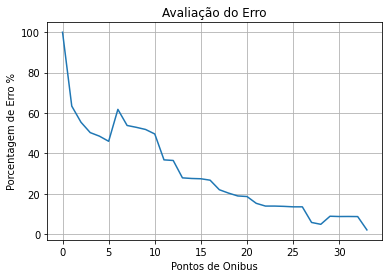

In [348]:
plt.plot(Erros)
plt.title('Avaliação do Erro')
plt.xlabel('Pontos de Onibus')
plt.ylabel('Porcentagem de Erro %')
plt.grid()
plt.show()

In [312]:
agrupamento_junho = matriz_junho.groupby(['PontoInicial','PontoFinal']).agg({'sequence':'count'}).reset_index()
agrupamento_junho.pivot(index= 'PontoInicial', columns='PontoFinal', values='sequence').fillna(0)

PontoFinal,1,2,3,4,5,6,7,8,9,10,...,24,25,26,27,28,29,30,31,32,33
PontoInicial,,,,,,,,,,,,,,,,,,,,,
1,0.0,75.0,35.0,0.0,10.0,35.0,20.0,5.0,5.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,25.0,5.0,0.0,0.0
2,0.0,0.0,5.0,0.0,10.0,5.0,25.0,35.0,130.0,0.0,...,40.0,70.0,20.0,45.0,5.0,0.0,0.0,10.0,25.0,10.0
3,45.0,115.0,10.0,10.0,70.0,0.0,15.0,5.0,0.0,0.0,...,15.0,0.0,15.0,35.0,10.0,0.0,0.0,30.0,15.0,10.0
4,0.0,20.0,10.0,0.0,30.0,5.0,15.0,20.0,0.0,0.0,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,5.0,5.0,25.0
5,0.0,90.0,5.0,0.0,0.0,10.0,0.0,0.0,15.0,0.0,...,0.0,10.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,10.0
6,5.0,5.0,5.0,0.0,0.0,5.0,15.0,5.0,0.0,0.0,...,10.0,0.0,0.0,5.0,5.0,0.0,10.0,5.0,0.0,0.0
7,0.0,50.0,0.0,5.0,5.0,0.0,0.0,5.0,10.0,30.0,...,0.0,10.0,5.0,5.0,0.0,0.0,5.0,5.0,40.0,0.0
8,0.0,80.0,0.0,0.0,5.0,10.0,0.0,0.0,0.0,40.0,...,20.0,15.0,0.0,5.0,0.0,5.0,0.0,0.0,10.0,5.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,55.0,10.0,20.0,0.0,0.0,0.0,0.0,20.0,10.0


In [290]:
agrupamento_junho = matriz_junho.groupby(['PontoInicial','PontoFinal']).agg({'sequence':'count'}).reset_index()
agrupamento_junho

,PontoInicial,PontoFinal,sequence
0,1,1,8150
1,1,2,3300
2,1,3,335
3,1,4,1185
4,2,1,2770
5,2,2,2180
6,2,3,220
7,2,4,365
8,3,1,440
9,3,2,575


In [272]:
matriz_junho_agrupada

index_col  device_id  periodo  dataInicio  \
day PontoInicial PontoFinal                                              
1   1            11                  1          5        5           5   
                 31                  2         10       10          10   
    2            8                   2         10       10          10   
                 11                  2         10       10          10   
                 20                  3         15       15          15   
...                                ...        ...      ...         ...   
30  30           14                  2         10       10          10   
                 26                  1          5        5           5   
                 30                  1          5        5           5   
    32           16                  1          5        5           5   
    33           32                  1          5        5           5   

                             dataFim  sequence  distance(m)  duration(s)  \
day PontoInicial PontoFinal                                                
1   1            11                5         5            5            5   
                 31               10        10           10           10   
    2            8                10        10           10           10   
                 11               10        10           10           10   
                 20               15        15           15           15   
...                              ...       ...          ...          ...   
30  30           14               10        10           10           10   
                 26                5         5            5            5   
                 30                5         5            5            5   
    32           16                5         5            5            5   
    33           32                5         5            5            5   

                             latitudeI  longitudeI  latitudeF  longitudeF  \
day PontoInicial PontoFinal                                                 
1   1            11                  5           5          5           5   
                 31                 10          10         10          10   
    2            8                  10          10         10          10   
                 11                 10          10         10          10   
                 20                 15          15         15          15   
...                                ...         ...        ...         ...   
30  30           14                 10          10         10          10   
                 26                  5           5          5           5   
                 30                  5           5          5           5   
    32           16                  5           5          5           5   
    33           32                  5           5          5           5   

                             OrdemSaida  OrdemChegada  dist_x  dist_y  
day PontoInicial PontoFinal                                            
1   1            11                   5             5       5       5  
                 31                  10            10      10      10  
    2            8                   10            10      10      10  
                 11                  10            10      10      10  
                 20                  15            15      15      15  
...                                 ...           ...     ...     ...  
30  30           14                  10            10      10      10  
                 26                   5             5       5       5  
                 30                   5             5       5       5  
    32           16                   5             5       5       5  
    33           32                   5             5       5       5  

[2325 rows x 16 columns]

In [282]:
soma_diagonal_principal(OD_junho)

KeyError: 0

In [230]:
pivotttt = matriz_junho_agrupada[   (matriz_junho_agrupada['dataInicio'] == 1)  &
                                    (matriz_junho_agrupada['day'] == 1)         &
                                    (matriz_junho_agrupada['periodo'] == 'Tarde')].pivot(index= 'PontoInicial', columns='PontoFinal', values='sequence').fillna(0)
pivotttt

KeyError: 'day'

In [57]:
pivotttt = matriz_junho_agrupada[   (matriz_junho_agrupada['dataInicio'] == 6)  &
                                    (matriz_junho_agrupada['day'] == 1)         &
                                    (matriz_junho_agrupada['periodo'] == 'Tarde')].pivot(index= 'PontoInicial', columns='PontoFinal', values='sequence').fillna(0)
pivotttt

KeyError: 'day'

In [231]:
for num in range(len(viagens_por_parada)):

    matriz_junho.iloc[matriz_junho.index.isin(viagens_por_parada[num]), 14] = paradas_eletrico_inicio.at[ num,'PontoInicial']
matriz_junho.head(15)

,index_col,day,device_id,periodo,dataInicio,dataFim,sequence,distance(m),duration(s),latitudeI,longitudeI,latitudeF,longitudeF,OrdemSaida,OrdemChegada,PontoFinal,dist_x,PontoInicial,dist_y
0,None_6,1,0,Manha,2021-06-01 06:44:02,2021-06-01 06:45:20,1,333.068136,78.0,-22.827145,-47.061214,-22.829490,-47.060281,FCM / Hemocentro,13,18,0.000124,18,0.000477
1,None_6,1,0,Manha,2021-06-01 07:58:17,2021-06-01 07:59:35,4,362.164440,78.0,-22.827037,-47.061207,-22.829638,-47.060359,FCM / Hemocentro,13,18,0.000179,18,0.000352
2,None_6,1,0,Manha,2021-06-01 09:06:10,2021-06-01 09:07:28,6,350.063969,78.0,-22.827116,-47.061166,-22.829648,-47.060414,FCM / Hemocentro,13,18,0.000180,18,0.000296
3,None_6,1,0,Manha,2021-06-01 11:10:03,2021-06-01 11:11:21,7,361.522224,78.0,-22.827030,-47.061240,-22.829614,-47.060350,FCM / Hemocentro,13,18,0.000153,18,0.000366
4,None_6,1,0,Manha,2021-06-01 11:57:21,2021-06-01 11:58:42,9,339.187065,81.0,-22.827211,-47.061172,-22.829681,-47.060513,FCM / Hemocentro,13,18,0.000156,18,0.000192
5,None_6,1,0,Tarde,2021-06-01 13:11:24,2021-06-01 13:12:40,12,372.564991,76.0,-22.826960,-47.061293,-22.829611,-47.060336,FCM / Hemocentro,13,18,0.000170,18,0.000381
6,None_6,1,0,Tarde,2021-06-01 13:55:05,2021-06-01 13:56:25,13,344.064957,80.0,-22.827157,-47.061188,-22.829680,-47.060602,FCM / Hemocentro,13,18,0.000145,18,0.000106
7,None_6,1,0,Tarde,2021-06-01 14:31:53,2021-06-01 14:33:33,14,369.088840,100.0,-22.826986,-47.061290,-22.829688,-47.060639,FCM / Hemocentro,13,18,0.000149,18,0.000069
8,None_6,1,0,Tarde,2021-06-01 14:56:59,2021-06-01 14:59:37,15,347.241352,158.0,-22.827141,-47.061162,-22.829649,-47.060402,FCM / Hemocentro,13,18,0.000174,18,0.000307
9,None_6,1,0,Tarde,2021-06-01 15:38:00,2021-06-01 16:02:17,17,315.806014,1457.0,-22.827537,-47.061047,-22.829799,-47.060286,FCM / Hemocentro,13,18,0.000442,18,0.000425


In [ ]:
matriz_junho.loc[matriz_junho['day'] == 1,'PontoInicial'].isna().value_counts()

In [ ]:
188+175

In [ ]:
len(viagens_por_parada)

In [ ]:
soma = 0

for i in range(len(viagens_por_parada)):
    soma += len(viagens_por_parada[i])
    print('------------->',(viagens_por_parada[i]))
print('\t', soma)

In [ ]:
len(viagens_por_parada[0]) + len(viagens_por_parada[0]) + 

In [ ]:
paradas_eletrico_final

IndexError: list index out of range

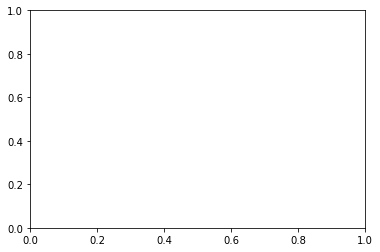

In [232]:

# Visualize clustering results.
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, pontos_onibus)
# visualizer.show()
visualizer.append_cluster(pontos_onibus, marker='*', markersize=10)
# visualizer.show()
visualizer.append_cluster(medians, marker='*', markersize=10)
visualizer.show()